# Diode Waveform with bunches every 8ns (Data length is about 4us)

In [178]:
import os
import matplotlib.pyplot as plt
import numpy as np
import math

# Parameters
top_level=f'{os.getcwd()}/..'
path    = f'{top_level}/data/RefCurve_2023-10-18_8ns_1ps.npy'

waveform=np.load(path)

(0.0, 110.0)

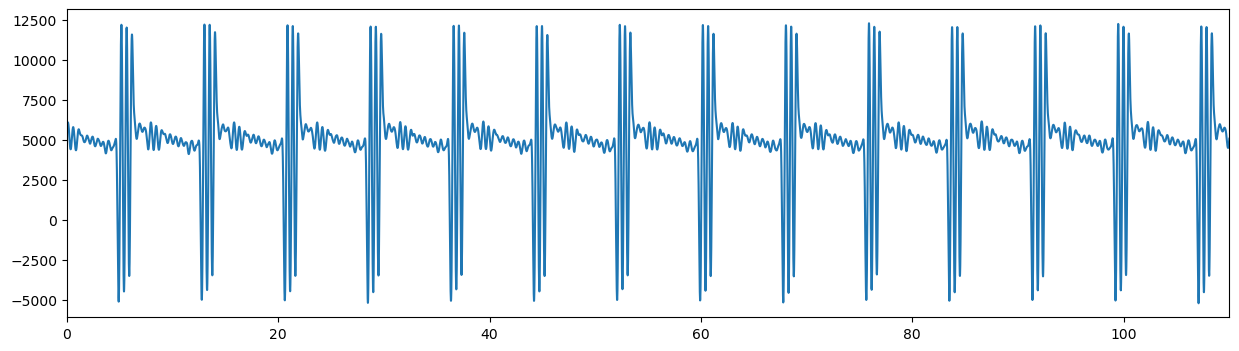

In [198]:
timeBin = 1E-3 # Unit of ns

timestep=np.arange(0,len(waveform))*timeBin
plt.figure(figsize=(15,4))
plt.plot(timestep,waveform)
plt.xlim(0,110)

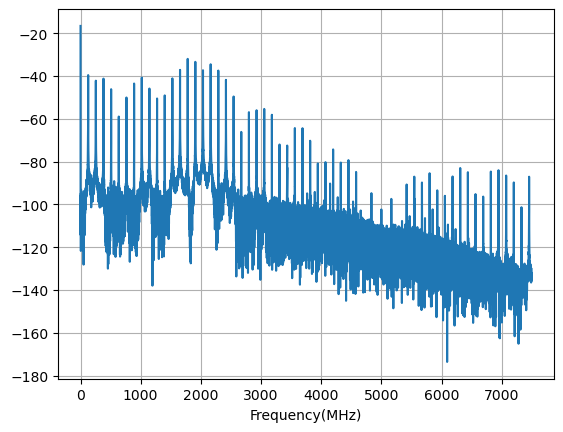

In [180]:
#FFT
size    = len(waveform) # Number of data points in the file
timeBin = 1E-3 # Unit of ns
freqBin = (0.5E+3/timeBin)/float(size//2) # Units of MHz
freqSteps = np.linspace(0, freqBin*(size//2-1), num=size//2)
freq = np.fft.fft(waveform)/float(size)
freq = freq[range(size//2)]
mag = 20.0*np.log10(np.abs(freq)/32767.0) # Units of dBFS

plt.plot(freqSteps[0:30000],mag[0:30000])
plt.xlabel("Frequency(MHz)")

plt.grid()

# Usig High pass filter, delete DC offset

In [225]:
h=[0.0045125,0.00010091,0.00010096,0.00010103,0.00010106,0.00010113,0.00010114,0.00010122,0.00010122,0.0001013,0.00010128,0.00010136,0.00010134,0.00010142,0.00010138,0.00010146,0.0001014,0.00010149,0.00010142,0.0001015,0.00010141,0.00010149,0.0001014,0.00010147,0.00010136,0.00010143,0.0001013,0.00010136,0.00010122,0.00010126,0.00010111,0.00010105,0.00011008,0.00010274,0.00010252,0.00010278,0.00010263,0.00010287,0.00010273,0.00010297,0.00010283,0.00010308,0.00010292,0.00010317,0.00010301,0.00010327,0.00010309,0.00010335,0.00010317,0.00010342,0.00010323,0.00010349,0.00010327,0.00010353,0.0001033,0.00010355,0.00010331,0.00010355,0.00010329,0.00010352,0.00010323,0.00010344,0.00010313,0.00010327,0.00010564,0.00010415,0.00010384,0.00010422,0.00010394,0.00010432,0.00010404,0.00010442,0.00010414,0.00010453,0.00010425,0.00010464,0.00010435,0.00010475,0.00010445,0.00010486,0.00010455,0.00010496,0.00010464,0.00010506,0.00010472,0.00010514,0.00010479,0.00010521,0.00010484,0.00010525,0.00010486,0.00010525,0.00010483,0.0001052,0.00010475,0.00010505,0.00010591,0.00010563,0.0001052,0.0001057,0.00010528,0.00010579,0.00010537,0.00010588,0.00010546,0.00010598,0.00010555,0.00010608,0.00010564,0.00010618,0.00010574,0.00010629,0.00010584,0.0001064,0.00010594,0.0001065,0.00010604,0.0001066,0.00010613,0.00010669,0.0001062,0.00010676,0.00010624,0.00010679,0.00010625,0.00010677,0.00010618,0.00010664,0.00010684,0.00010706,0.00010649,0.00010712,0.00010656,0.00010719,0.00010663,0.00010727,0.00010669,0.00010734,0.00010676,0.00010742,0.00010684,0.0001075,0.00010691,0.00010759,0.00010699,0.00010768,0.00010708,0.00010777,0.00010717,0.00010787,0.00010725,0.00010796,0.00010733,0.00010804,0.00010739,0.00010809,0.00010741,0.00010808,0.00010736,0.00010796,0.00010777,0.00010829,0.00010758,0.00010834,0.00010763,0.00010839,0.00010768,0.00010845,0.00010773,0.0001085,0.00010778,0.00010856,0.00010782,0.00010861,0.00010787,0.00010867,0.00010792,0.00010873,0.00010798,0.0001088,0.00010804,0.00010887,0.00010811,0.00010895,0.00010818,0.00010902,0.00010823,0.00010907,0.00010826,0.00010908,0.00010822,0.00010897,0.00010848,0.00010922,0.00010837,0.00010926,0.00010841,0.0001093,0.00010845,0.00010934,0.00010848,0.00010938,0.00010851,0.00010941,0.00010853,0.00010944,0.00010855,0.00010948,0.00010858,0.00010951,0.00010861,0.00010955,0.00010864,0.00010959,0.00010868,0.00010964,0.00010872,0.0001097,0.00010877,0.00010974,0.00010879,0.00010975,0.00010875,0.00010964,0.00010892,0.00010983,0.00010884,0.00010986,0.00010887,0.00010989,0.00010889,0.00010992,0.00010891,0.00010995,0.00010893,0.00010997,0.00010894,0.00010998,0.00010895,0.00011,0.00010895,0.00011001,0.00010895,0.00011002,0.00010896,0.00011004,0.00010897,0.00011006,0.000109,0.0001101,0.00010902,0.00011012,0.00010903,0.00011012,0.00010899,0.00011001,0.00010908,0.00011016,0.00010902,0.00011017,0.00010903,0.00011018,0.00010904,0.0001102,0.00010905,0.00011021,0.00010905,0.00011022,0.00010905,0.00011023,0.00010905,0.00011023,0.00010904,0.00011023,0.00010903,0.00011022,0.00010902,0.00011022,0.00010901,0.00011022,0.00010901,0.00011023,0.00010901,0.00011024,0.00010901,0.00011023,0.00010896,0.00011011,0.000109,0.00011022,0.00010894,0.00011021,0.00010893,0.0001102,0.00010892,0.0001102,0.00010891,0.0001102,0.0001089,0.0001102,0.00010888,0.00011019,0.00010887,0.00011018,0.00010885,0.00011016,0.00010882,0.00011014,0.00010879,0.00011012,0.00010877,0.00011011,0.00010874,0.0001101,0.00010873,0.00011009,0.00010871,0.00011007,0.00010866,0.00010994,0.00010865,0.00011001,0.00010858,0.00010997,0.00010855,0.00010995,0.00010851,0.00010992,0.00010848,0.0001099,0.00010845,0.00010987,0.00010842,0.00010985,0.00010838,0.00010982,0.00010835,0.00010979,0.0001083,0.00010975,0.00010826,0.00010972,0.00010821,0.00010968,0.00010817,0.00010965,0.00010814,0.00010962,0.0001081,0.00010959,0.00010804,0.00010946,0.000108,0.00010949,0.00010792,0.00010943,0.00010786,0.00010938,0.0001078,0.00010933,0.00010774,0.00010928,0.00010768,0.00010923,0.00010763,0.00010918,0.00010757,0.00010913,0.00010751,0.00010908,0.00010744,0.00010902,0.00010738,0.00010896,0.00010731,0.0001089,0.00010724,0.00010884,0.00010718,0.00010879,0.00010713,0.00010874,0.00010705,0.00010861,0.00010698,0.0001086,0.00010688,0.00010852,0.0001068,0.00010845,0.00010672,0.00010837,0.00010664,0.0001083,0.00010655,0.00010822,0.00010647,0.00010814,0.00010638,0.00010806,0.00010629,0.00010798,0.0001062,0.0001079,0.00010611,0.00010781,0.00010601,0.00010772,0.00010591,0.00010764,0.00010583,0.00010756,0.00010575,0.00010749,0.00010566,0.00010734,0.00010555,0.0001073,0.00010544,0.0001072,0.00010534,0.0001071,0.00010523,0.000107,0.00010512,0.0001069,0.00010501,0.0001068,0.0001049,0.00010669,0.00010478,0.00010659,0.00010467,0.00010648,0.00010455,0.00010637,0.00010443,0.00010625,0.0001043,0.00010613,0.00010417,0.00010601,0.00010405,0.00010591,0.00010395,0.00010581,0.00010383,0.00010564,0.00010369,0.00010556,0.00010356,0.00010544,0.00010343,0.00010532,0.0001033,0.00010519,0.00010316,0.00010506,0.00010303,0.00010493,0.00010289,0.0001048,0.00010275,0.00010467,0.00010261,0.00010454,0.00010246,0.0001044,0.00010232,0.00010426,0.00010216,0.00010411,0.000102,0.00010396,0.00010185,0.00010382,0.00010171,0.00010369,0.00010157,0.0001035,0.0001014,0.00010338,0.00010123,0.00010323,0.00010108,0.00010308,0.00010092,0.00010293,0.00010075,0.00010277,0.00010059,0.00010262,0.00010042,0.00010246,0.00010026,0.0001023,0.00010009,0.00010214,9.9923e-05,0.00010198,9.975e-05,0.00010181,9.957e-05,0.00010163,9.9383e-05,0.00010145,9.9198e-05,0.00010128,9.9025e-05,0.00010112,9.8854e-05,0.00010091,9.8652e-05,0.00010076,9.8459e-05,0.00010057,9.827e-05,0.00010039,9.8079e-05,0.00010021,9.7887e-05,0.00010002,9.7692e-05,9.9835e-05,9.7496e-05,9.9648e-05,9.7301e-05,9.946e-05,9.7105e-05,9.9272e-05,9.6909e-05,9.9082e-05,9.6709e-05,9.8888e-05,9.6504e-05,9.8686e-05,9.6291e-05,9.8478e-05,9.6075e-05,9.8274e-05,9.5871e-05,9.8084e-05,9.5673e-05,9.7845e-05,9.5439e-05,9.7661e-05,9.5216e-05,9.7447e-05,9.4996e-05,9.7232e-05,9.4773e-05,9.7016e-05,9.4547e-05,9.6797e-05,9.432e-05,9.6577e-05,9.4091e-05,9.6356e-05,9.3862e-05,9.6134e-05,9.3633e-05,9.5914e-05,9.3404e-05,9.5693e-05,9.3175e-05,9.5469e-05,9.2941e-05,9.524e-05,9.2699e-05,9.5003e-05,9.2454e-05,9.4767e-05,9.2218e-05,9.4546e-05,9.1991e-05,9.4283e-05,9.1727e-05,9.4064e-05,9.1475e-05,9.382e-05,9.1223e-05,9.3574e-05,9.0969e-05,9.3326e-05,9.0712e-05,9.3075e-05,9.0451e-05,9.2821e-05,9.0187e-05,9.2564e-05,8.9923e-05,9.2307e-05,8.9658e-05,9.2051e-05,8.9394e-05,9.1795e-05,8.9131e-05,9.1538e-05,8.8864e-05,9.1277e-05,8.8591e-05,9.1007e-05,8.8312e-05,9.0738e-05,8.8042e-05,9.0483e-05,8.7784e-05,9.0193e-05,8.7489e-05,8.994e-05,8.7206e-05,8.9665e-05,8.6924e-05,8.9388e-05,8.6639e-05,8.9109e-05,8.635e-05,8.8826e-05,8.6057e-05,8.854e-05,8.5761e-05,8.825e-05,8.5462e-05,8.7957e-05,8.5162e-05,8.7665e-05,8.4861e-05,8.7373e-05,8.4561e-05,8.708e-05,8.426e-05,8.6783e-05,8.3952e-05,8.6479e-05,8.3638e-05,8.6173e-05,8.333e-05,8.5881e-05,8.3038e-05,8.5561e-05,8.2708e-05,8.5271e-05,8.2393e-05,8.4963e-05,8.2078e-05,8.4654e-05,8.176e-05,8.4342e-05,8.144e-05,8.4028e-05,8.1116e-05,8.371e-05,8.0788e-05,8.3388e-05,8.0456e-05,8.3062e-05,8.0122e-05,8.2735e-05,7.9786e-05,8.2407e-05,7.9451e-05,8.2079e-05,7.9114e-05,8.1748e-05,7.8772e-05,8.1408e-05,7.8421e-05,8.1065e-05,7.8074e-05,8.0733e-05,7.7746e-05,8.038e-05,7.7379e-05,8.0051e-05,7.7028e-05,7.9707e-05,7.6677e-05,7.9362e-05,7.6324e-05,7.9016e-05,7.597e-05,7.8668e-05,7.5613e-05,7.8317e-05,7.5252e-05,7.7962e-05,7.4888e-05,7.7604e-05,7.452e-05,7.7243e-05,7.4151e-05,7.6881e-05,7.3781e-05,7.6519e-05,7.341e-05,7.6153e-05,7.3034e-05,7.578e-05,7.2649e-05,7.54e-05,7.2265e-05,7.5031e-05,7.1899e-05,7.4643e-05,7.1496e-05,7.4274e-05,7.1107e-05,7.3892e-05,7.0717e-05,7.3509e-05,7.0327e-05,7.3125e-05,6.9935e-05,7.2741e-05,6.9542e-05,7.2354e-05,6.9146e-05,7.1964e-05,6.8747e-05,7.1571e-05,6.8345e-05,7.1175e-05,6.7941e-05,7.0779e-05,6.7536e-05,7.0381e-05,6.7131e-05,6.9983e-05,6.6722e-05,6.9577e-05,6.6304e-05,6.9162e-05,6.5883e-05,6.8755e-05,6.5481e-05,6.8335e-05,6.5042e-05,6.7927e-05,6.4616e-05,6.7507e-05,6.4189e-05,6.7085e-05,6.3759e-05,6.6663e-05,6.3329e-05,6.6239e-05,6.2897e-05,6.5814e-05,6.2463e-05,6.5386e-05,6.2026e-05,6.4955e-05,6.1586e-05,6.4522e-05,6.1144e-05,6.4088e-05,6.0702e-05,6.3653e-05,6.0261e-05,6.3219e-05,5.9818e-05,6.2779e-05,5.9365e-05,6.233e-05,5.8909e-05,6.1886e-05,5.8471e-05,6.1433e-05,5.7997e-05,6.0988e-05,5.7536e-05,6.0531e-05,5.7071e-05,6.0072e-05,5.6604e-05,5.9611e-05,5.6135e-05,5.9149e-05,5.5663e-05,5.8685e-05,5.519e-05,5.8217e-05,5.4715e-05,5.7747e-05,5.4235e-05,5.7274e-05,5.3754e-05,5.6799e-05,5.3271e-05,5.6325e-05,5.279e-05,5.5852e-05,5.2309e-05,5.5374e-05,5.182e-05,5.4888e-05,5.1326e-05,5.4406e-05,5.085e-05,5.3919e-05,5.0342e-05,5.3437e-05,4.9844e-05,5.2944e-05,4.9344e-05,5.2448e-05,4.884e-05,5.195e-05,4.8333e-05,5.145e-05,4.7824e-05,5.0948e-05,4.7313e-05,5.0442e-05,4.6799e-05,4.9933e-05,4.628e-05,4.942e-05,4.5758e-05,4.8905e-05,4.5235e-05,4.8389e-05,4.4712e-05,4.7874e-05,4.419e-05,4.7357e-05,4.3661e-05,4.6831e-05,4.3127e-05,4.6308e-05,4.2611e-05,4.5784e-05,4.2066e-05,4.5263e-05,4.1531e-05,4.4733e-05,4.0993e-05,4.42e-05,4.0452e-05,4.3665e-05,3.9908e-05,4.3127e-05,3.9362e-05,4.2588e-05,3.8814e-05,4.2045e-05,3.8263e-05,4.1499e-05,3.7706e-05,4.0948e-05,3.7146e-05,4.0393e-05,3.6583e-05,3.9837e-05,3.602e-05,3.9281e-05,3.5457e-05,3.8724e-05,3.4888e-05,3.8157e-05,3.4312e-05,3.7592e-05,3.3755e-05,3.7028e-05,3.317e-05,3.6466e-05,3.2595e-05,3.5896e-05,3.2017e-05,3.5324e-05,3.1437e-05,3.475e-05,3.0855e-05,3.4174e-05,3.0271e-05,3.3597e-05,2.9685e-05,3.3017e-05,2.9098e-05,3.2435e-05,2.8505e-05,3.1847e-05,2.7908e-05,3.1256e-05,2.7308e-05,3.0661e-05,2.6706e-05,3.0066e-05,2.6104e-05,2.947e-05,2.5496e-05,2.8864e-05,2.488e-05,2.8257e-05,2.4281e-05,2.7654e-05,2.3656e-05,2.705e-05,2.304e-05,2.6439e-05,2.2422e-05,2.5827e-05,2.1802e-05,2.5212e-05,2.1179e-05,2.4596e-05,2.0555e-05,2.3979e-05,1.993e-05,2.336e-05,1.9304e-05,2.274e-05,1.8674e-05,2.2116e-05,1.8041e-05,2.1488e-05,1.7404e-05,2.0855e-05,1.6764e-05,2.0223e-05,1.6125e-05,1.959e-05,1.5481e-05,1.8947e-05,1.4827e-05,1.8301e-05,1.4188e-05,1.766e-05,1.3525e-05,1.7016e-05,1.287e-05,1.6365e-05,1.2212e-05,1.5712e-05,1.1551e-05,1.5057e-05,1.0887e-05,1.44e-05,1.0222e-05,1.3741e-05,9.556e-06,1.3082e-05,8.8895e-06,1.2422e-05,8.2207e-06,1.1759e-05,7.549e-06,1.1092e-05,6.8737e-06,1.0422e-05,6.1963e-06,9.7522e-06,5.5198e-06,9.0821e-06,4.8397e-06,8.4035e-06,4.1494e-06,7.7193e-06,3.4717e-06,7.042e-06,2.7726e-06,6.3599e-06,2.08e-06,5.6717e-06,1.3842e-06,4.9806e-06,6.8459e-07,4.2861e-06,-1.842e-08,3.5891e-06,-7.2396e-07,2.8899e-06,-1.4305e-06,2.1894e-06,-2.1379e-06,1.4884e-06,-2.8472e-06,7.8517e-07,-3.5588e-06,7.8944e-08,-4.2737e-06,-6.3086e-07,-4.9907e-06,-1.3404e-06,-5.7063e-06,-2.0489e-06,-6.4238e-06,-2.7645e-06,-7.1512e-06,-3.4867e-06,-7.8672e-06,-4.2003e-06,-8.6021e-06,-4.9194e-06,-9.3309e-06,-5.6439e-06,-1.0063e-05,-6.3712e-06,-1.0799e-05,-7.1022e-06,-1.1539e-05,-7.8365e-06,-1.2282e-05,-8.574e-06,-1.3027e-05,-9.3137e-06,-1.3774e-05,-1.0054e-05,-1.4522e-05,-1.0797e-05,-1.5274e-05,-1.1543e-05,-1.6028e-05,-1.2293e-05,-1.6785e-05,-1.3043e-05,-1.7541e-05,-1.3791e-05,-1.8298e-05,-1.4545e-05,-1.9063e-05,-1.5307e-05,-1.9819e-05,-1.6058e-05,-2.0591e-05,-1.6815e-05,-2.1357e-05,-1.7576e-05,-2.2125e-05,-1.8339e-05,-2.2896e-05,-1.9106e-05,-2.3671e-05,-1.9875e-05,-2.445e-05,-2.0649e-05,-2.5231e-05,-2.1425e-05,-2.6014e-05,-2.2202e-05,-2.68e-05,-2.2982e-05,-2.7588e-05,-2.3765e-05,-2.838e-05,-2.4553e-05,-2.9176e-05,-2.5342e-05,-2.9971e-05,-2.613e-05,-3.0767e-05,-2.6922e-05,-3.1571e-05,-2.7723e-05,-3.2367e-05,-2.8514e-05,-3.3177e-05,-2.931e-05,-3.3981e-05,-3.0108e-05,-3.4786e-05,-3.0909e-05,-3.5594e-05,-3.1711e-05,-3.6404e-05,-3.2516e-05,-3.7218e-05,-3.3324e-05,-3.8034e-05,-3.4136e-05,-3.8853e-05,-3.4948e-05,-3.9673e-05,-3.5763e-05,-4.0496e-05,-3.658e-05,-4.1322e-05,-3.7403e-05,-4.2154e-05,-3.8229e-05,-4.2985e-05,-3.9053e-05,-4.3817e-05,-3.9882e-05,-4.4658e-05,-4.072e-05,-4.5492e-05,-4.1548e-05,-4.6339e-05,-4.2383e-05,-4.7182e-05,-4.322e-05,-4.8025e-05,-4.4058e-05,-4.887e-05,-4.4897e-05,-4.9717e-05,-4.5738e-05,-5.0567e-05,-4.6583e-05,-5.1418e-05,-4.7429e-05,-5.2271e-05,-4.8276e-05,-5.3126e-05,-4.9125e-05,-5.3983e-05,-4.9976e-05,-5.4842e-05,-5.0832e-05,-5.5706e-05,-5.1691e-05,-5.6572e-05,-5.2549e-05,-5.7437e-05,-5.341e-05,-5.8311e-05,-5.4284e-05,-5.9181e-05,-5.5147e-05,-6.0063e-05,-5.6017e-05,-6.0941e-05,-5.6891e-05,-6.1821e-05,-5.7765e-05,-6.2702e-05,-5.8641e-05,-6.3585e-05,-5.9518e-05,-6.4471e-05,-6.0399e-05,-6.5358e-05,-6.1281e-05,-6.6247e-05,-6.2164e-05,-6.7137e-05,-6.3047e-05,-6.8028e-05,-6.3932e-05,-6.8921e-05,-6.4821e-05,-6.9818e-05,-6.5713e-05,-7.0716e-05,-6.6603e-05,-7.1612e-05,-6.7496e-05,-7.2517e-05,-6.8401e-05,-7.342e-05,-6.9296e-05,-7.4333e-05,-7.0199e-05,-7.5244e-05,-7.1106e-05,-7.6157e-05,-7.2014e-05,-7.7073e-05,-7.2923e-05,-7.799e-05,-7.3835e-05,-7.891e-05,-7.475e-05,-7.9832e-05,-7.5668e-05,-8.0756e-05,-7.6586e-05,-8.1681e-05,-7.7505e-05,-8.2607e-05,-7.8424e-05,-8.3534e-05,-7.9346e-05,-8.4464e-05,-8.0272e-05,-8.5395e-05,-8.1195e-05,-8.6324e-05,-8.2119e-05,-8.7259e-05,-8.3055e-05,-8.8194e-05,-8.3981e-05,-8.9137e-05,-8.4914e-05,-9.0078e-05,-8.5852e-05,-9.1022e-05,-8.679e-05,-9.1968e-05,-8.7731e-05,-9.2916e-05,-8.8674e-05,-9.3867e-05,-8.962e-05,-9.4821e-05,-9.057e-05,-9.5778e-05,-9.1521e-05,-9.6736e-05,-9.2474e-05,-9.7695e-05,-9.3427e-05,-9.8655e-05,-9.4382e-05,-9.9619e-05,-9.5341e-05,-0.00010058,-9.6298e-05,-0.00010155,-9.7254e-05,-0.00010251,-9.8221e-05,-0.00010348,-9.9178e-05,-0.00010445,-0.00010014,-0.00010542,-0.00010111,-0.0001064,-0.00010208,-0.00010737,-0.00010305,-0.00010835,-0.00010402,-0.00010933,-0.00010499,-0.00011031,-0.00010597,-0.00011129,-0.00010695,-0.00011228,-0.00010793,-0.00011327,-0.00010892,-0.00011426,-0.0001099,-0.00011526,-0.00011089,-0.00011625,-0.00011188,-0.00011725,-0.00011287,-0.00011824,-0.00011387,-0.00011924,-0.00011486,-0.00012025,-0.00011585,-0.00012125,-0.00011685,-0.00012225,-0.00011785,-0.00012325,-0.00011884,-0.00012426,-0.00011984,-0.00012526,-0.00012085,-0.00012627,-0.00012185,-0.00012729,-0.00012286,-0.0001283,-0.00012387,-0.00012932,-0.00012488,-0.00013033,-0.00012589,-0.00013135,-0.00012691,-0.00013238,-0.00012793,-0.0001334,-0.00012894,-0.00013443,-0.00012997,-0.00013546,-0.00013099,-0.00013649,-0.00013201,-0.00013752,-0.00013304,-0.00013855,-0.00013406,-0.00013958,-0.00013509,-0.00014062,-0.00013612,-0.00014165,-0.00013715,-0.00014268,-0.00013818,-0.00014372,-0.00013921,-0.00014476,-0.00014024,-0.0001458,-0.00014128,-0.00014684,-0.00014232,-0.00014789,-0.00014336,-0.00014894,-0.0001444,-0.00014998,-0.00014544,-0.00015103,-0.00014649,-0.00015209,-0.00014754,-0.00015315,-0.00014859,-0.0001542,-0.00014964,-0.00015526,-0.00015069,-0.00015632,-0.00015175,-0.00015738,-0.0001528,-0.00015844,-0.00015386,-0.0001595,-0.00015491,-0.00016056,-0.00015597,-0.00016163,-0.00015703,-0.00016269,-0.00015809,-0.00016376,-0.00015915,-0.00016483,-0.00016021,-0.0001659,-0.00016128,-0.00016697,-0.00016234,-0.00016804,-0.00016341,-0.00016911,-0.00016448,-0.00017019,-0.00016555,-0.00017127,-0.00016663,-0.00017235,-0.0001677,-0.00017343,-0.00016878,-0.00017452,-0.00016986,-0.0001756,-0.00017094,-0.00017669,-0.00017202,-0.00017778,-0.0001731,-0.00017886,-0.00017418,-0.00017995,-0.00017527,-0.00018104,-0.00017635,-0.00018213,-0.00017743,-0.00018322,-0.00017852,-0.00018431,-0.00017961,-0.00018541,-0.0001807,-0.0001865,-0.00018178,-0.0001876,-0.00018287,-0.0001887,-0.00018397,-0.0001898,-0.00018506,-0.0001909,-0.00018616,-0.000192,-0.00018726,-0.00019311,-0.00018836,-0.00019421,-0.00018946,-0.00019532,-0.00019056,-0.00019643,-0.00019167,-0.00019754,-0.00019277,-0.00019865,-0.00019388,-0.00019976,-0.00019498,-0.00020087,-0.00019609,-0.00020199,-0.0001972,-0.0002031,-0.00019831,-0.00020421,-0.00019941,-0.00020533,-0.00020052,-0.00020644,-0.00020163,-0.00020756,-0.00020274,-0.00020867,-0.00020386,-0.00020979,-0.00020497,-0.00021092,-0.00020609,-0.00021204,-0.00020721,-0.00021316,-0.00020833,-0.00021429,-0.00020945,-0.00021542,-0.00021057,-0.00021654,-0.00021169,-0.00021767,-0.00021282,-0.0002188,-0.00021394,-0.00021993,-0.00021507,-0.00022106,-0.0002162,-0.0002222,-0.00021732,-0.00022333,-0.00021844,-0.00022446,-0.00021957,-0.00022559,-0.0002207,-0.00022673,-0.00022183,-0.00022786,-0.00022296,-0.00022899,-0.00022409,-0.00023013,-0.00022522,-0.00023127,-0.00022635,-0.00023241,-0.00022748,-0.00023355,-0.00022862,-0.00023469,-0.00022976,-0.00023583,-0.00023089,-0.00023698,-0.00023204,-0.00023812,-0.00023317,-0.00023926,-0.00023432,-0.00024041,-0.00023546,-0.00024156,-0.0002366,-0.00024271,-0.00023774,-0.00024385,-0.00023888,-0.000245,-0.00024002,-0.00024615,-0.00024117,-0.0002473,-0.00024231,-0.00024844,-0.00024345,-0.00024959,-0.0002446,-0.00025074,-0.00024574,-0.00025189,-0.00024689,-0.00025304,-0.00024803,-0.00025419,-0.00024918,-0.00025535,-0.00025033,-0.0002565,-0.00025148,-0.00025766,-0.00025263,-0.00025882,-0.00025378,-0.00025998,-0.00025494,-0.00026113,-0.00025609,-0.00026229,-0.00025724,-0.00026345,-0.0002584,-0.00026461,-0.00025955,-0.00026577,-0.0002607,-0.00026693,-0.00026186,-0.00026808,-0.00026301,-0.00026924,-0.00026416,-0.0002704,-0.00026532,-0.00027156,-0.00026647,-0.00027272,-0.00026763,-0.00027388,-0.00026878,-0.00027504,-0.00026994,-0.0002762,-0.0002711,-0.00027737,-0.00027225,-0.00027853,-0.00027341,-0.0002797,-0.00027457,-0.00028086,-0.00027573,-0.00028203,-0.0002769,-0.00028319,-0.00027806,-0.00028436,-0.00027922,-0.00028553,-0.00028038,-0.00028669,-0.00028154,-0.00028786,-0.0002827,-0.00028903,-0.00028387,-0.00029019,-0.00028503,-0.00029136,-0.00028619,-0.00029252,-0.00028735,-0.00029369,-0.00028851,-0.00029485,-0.00028967,-0.00029602,-0.00029083,-0.00029719,-0.00029199,-0.00029835,-0.00029315,-0.00029952,-0.00029432,-0.00030069,-0.00029548,-0.00030186,-0.00029665,-0.00030303,-0.00029781,-0.0003042,-0.00029898,-0.00030537,-0.00030014,-0.00030654,-0.00030131,-0.00030771,-0.00030248,-0.00030888,-0.00030364,-0.00031005,-0.0003048,-0.00031122,-0.00030597,-0.00031239,-0.00030713,-0.00031355,-0.0003083,-0.00031472,-0.00030946,-0.00031589,-0.00031062,-0.00031706,-0.00031178,-0.00031822,-0.00031294,-0.00031939,-0.00031411,-0.00032056,-0.00031527,-0.00032173,-0.00031644,-0.0003229,-0.0003176,-0.00032407,-0.00031877,-0.00032524,-0.00031993,-0.00032641,-0.0003211,-0.00032758,-0.00032226,-0.00032875,-0.00032343,-0.00032992,-0.0003246,-0.00033109,-0.00032576,-0.00033225,-0.00032692,-0.00033343,-0.00032808,-0.00033459,-0.00032925,-0.00033576,-0.00033041,-0.00033692,-0.00033157,-0.00033809,-0.00033273,-0.00033925,-0.00033389,-0.00034042,-0.00033505,-0.00034158,-0.00033621,-0.00034275,-0.00033737,-0.00034391,-0.00033853,-0.00034508,-0.00033969,-0.00034624,-0.00034085,-0.00034741,-0.00034201,-0.00034857,-0.00034318,-0.00034974,-0.00034434,-0.0003509,-0.0003455,-0.00035207,-0.00034666,-0.00035324,-0.00034782,-0.0003544,-0.00034898,-0.00035556,-0.00035013,-0.00035672,-0.00035129,-0.00035788,-0.00035244,-0.00035904,-0.0003536,-0.0003602,-0.00035475,-0.00036136,-0.0003559,-0.00036251,-0.00035706,-0.00036367,-0.00035821,-0.00036483,-0.00035936,-0.00036598,-0.00036051,-0.00036714,-0.00036167,-0.0003683,-0.00036282,-0.00036945,-0.00036397,-0.00037061,-0.00036513,-0.00037177,-0.00036628,-0.00037293,-0.00036743,-0.00037408,-0.00036858,-0.00037524,-0.00036973,-0.00037639,-0.00037088,-0.00037754,-0.00037202,-0.00037869,-0.00037317,-0.00037984,-0.00037431,-0.00038099,-0.00037546,-0.00038213,-0.0003766,-0.00038328,-0.00037774,-0.00038443,-0.00037888,-0.00038557,-0.00038002,-0.00038672,-0.00038116,-0.00038786,-0.0003823,-0.000389,-0.00038344,-0.00039015,-0.00038458,-0.00039129,-0.00038572,-0.00039244,-0.00038686,-0.00039358,-0.000388,-0.00039472,-0.00038914,-0.00039586,-0.00039028,-0.000397,-0.00039141,-0.00039814,-0.00039254,-0.00039928,-0.00039367,-0.00040041,-0.00039481,-0.00040155,-0.00039594,-0.00040268,-0.00039706,-0.00040381,-0.00039819,-0.00040494,-0.00039932,-0.00040607,-0.00040044,-0.0004072,-0.00040156,-0.00040833,-0.00040269,-0.00040945,-0.00040381,-0.00041058,-0.00040493,-0.00041171,-0.00040606,-0.00041283,-0.00040718,-0.00041396,-0.0004083,-0.00041508,-0.00040942,-0.00041621,-0.00041054,-0.00041733,-0.00041166,-0.00041845,-0.00041277,-0.00041957,-0.00041389,-0.00042069,-0.000415,-0.0004218,-0.00041611,-0.00042292,-0.00041722,-0.00042403,-0.00041833,-0.00042514,-0.00041944,-0.00042625,-0.00042054,-0.00042736,-0.00042165,-0.00042847,-0.00042275,-0.00042957,-0.00042385,-0.00043068,-0.00042495,-0.00043178,-0.00042606,-0.00043289,-0.00042716,-0.00043399,-0.00042825,-0.0004351,-0.00042935,-0.0004362,-0.00043045,-0.0004373,-0.00043155,-0.0004384,-0.00043264,-0.0004395,-0.00043374,-0.00044059,-0.00043483,-0.00044169,-0.00043592,-0.00044278,-0.000437,-0.00044387,-0.00043809,-0.00044496,-0.00043917,-0.00044604,-0.00044026,-0.00044713,-0.00044134,-0.00044821,-0.00044241,-0.00044929,-0.00044349,-0.00045038,-0.00044457,-0.00045146,-0.00044565,-0.00045253,-0.00044672,-0.00045361,-0.0004478,-0.00045469,-0.00044887,-0.00045577,-0.00044994,-0.00045684,-0.00045101,-0.00045792,-0.00045208,-0.00045899,-0.00045315,-0.00046006,-0.00045421,-0.00046113,-0.00045528,-0.00046219,-0.00045634,-0.00046326,-0.0004574,-0.00046432,-0.00045846,-0.00046538,-0.00045951,-0.00046643,-0.00046056,-0.00046749,-0.00046162,-0.00046854,-0.00046266,-0.0004696,-0.00046371,-0.00047065,-0.00046476,-0.0004717,-0.00046581,-0.00047274,-0.00046685,-0.00047379,-0.00046789,-0.00047484,-0.00046894,-0.00047588,-0.00046998,-0.00047693,-0.00047101,-0.00047797,-0.00047205,-0.00047901,-0.00047309,-0.00048005,-0.00047412,-0.00048108,-0.00047515,-0.00048212,-0.00047618,-0.00048315,-0.00047721,-0.00048418,-0.00047823,-0.0004852,-0.00047926,-0.00048623,-0.00048027,-0.00048725,-0.00048129,-0.00048827,-0.00048231,-0.00048929,-0.00048332,-0.0004903,-0.00048433,-0.00049132,-0.00048535,-0.00049233,-0.00048635,-0.00049334,-0.00048736,-0.00049435,-0.00048837,-0.00049536,-0.00048937,-0.00049637,-0.00049038,-0.00049738,-0.00049138,-0.00049838,-0.00049238,-0.00049938,-0.00049338,-0.00050038,-0.00049437,-0.00050138,-0.00049537,-0.00050237,-0.00049635,-0.00050336,-0.00049734,-0.00050435,-0.00049833,-0.00050534,-0.00049931,-0.00050632,-0.00050029,-0.0005073,-0.00050126,-0.00050828,-0.00050224,-0.00050926,-0.00050321,-0.00051023,-0.00050418,-0.00051121,-0.00050515,-0.00051218,-0.00050612,-0.00051315,-0.00050709,-0.00051412,-0.00050805,-0.00051509,-0.00050902,-0.00051605,-0.00050998,-0.00051702,-0.00051094,-0.00051798,-0.0005119,-0.00051894,-0.00051285,-0.00051989,-0.0005138,-0.00052084,-0.00051475,-0.00052179,-0.00051569,-0.00052274,-0.00051664,-0.00052368,-0.00051758,-0.00052463,-0.00051851,-0.00052557,-0.00051945,-0.0005265,-0.00052038,-0.00052744,-0.00052131,-0.00052837,-0.00052224,-0.0005293,-0.00052317,-0.00053023,-0.00052409,-0.00053115,-0.00052502,-0.00053208,-0.00052594,-0.000533,-0.00052686,-0.00053392,-0.00052777,-0.00053484,-0.00052869,-0.00053576,-0.0005296,-0.00053667,-0.00053051,-0.00053758,-0.00053142,-0.00053849,-0.00053232,-0.0005394,-0.00053322,-0.0005403,-0.00053412,-0.00054119,-0.00053501,-0.00054209,-0.0005359,-0.00054298,-0.00053679,-0.00054387,-0.00053767,-0.00054476,-0.00053856,-0.00054564,-0.00053944,-0.00054653,-0.00054032,-0.00054741,-0.0005412,-0.00054829,-0.00054207,-0.00054916,-0.00054295,-0.00055004,-0.00054382,-0.00055091,-0.00054469,-0.00055178,-0.00054555,-0.00055265,-0.00054642,-0.00055352,-0.00054728,-0.00055438,-0.00054813,-0.00055523,-0.00054899,-0.00055609,-0.00054984,-0.00055694,-0.00055069,-0.00055779,-0.00055153,-0.00055863,-0.00055237,-0.00055948,-0.00055321,-0.00056031,-0.00055405,-0.00056115,-0.00055488,-0.00056199,-0.00055571,-0.00056282,-0.00055654,-0.00056365,-0.00055736,-0.00056447,-0.00055819,-0.0005653,-0.00055901,-0.00056612,-0.00055983,-0.00056694,-0.00056064,-0.00056776,-0.00056146,-0.00056858,-0.00056227,-0.00056939,-0.00056308,-0.0005702,-0.00056388,-0.000571,-0.00056468,-0.0005718,-0.00056548,-0.0005726,-0.00056627,-0.0005734,-0.00056707,-0.00057419,-0.00056785,-0.00057498,-0.00056864,-0.00057576,-0.00056942,-0.00057654,-0.0005702,-0.00057732,-0.00057097,-0.0005781,-0.00057175,-0.00057887,-0.00057252,-0.00057965,-0.00057329,-0.00058042,-0.00057405,-0.00058119,-0.00057482,-0.00058195,-0.00057558,-0.00058271,-0.00057634,-0.00058347,-0.00057709,-0.00058423,-0.00057784,-0.00058498,-0.00057859,-0.00058573,-0.00057934,-0.00058647,-0.00058008,-0.00058721,-0.00058082,-0.00058795,-0.00058155,-0.00058869,-0.00058228,-0.00058942,-0.00058301,-0.00059014,-0.00058373,-0.00059087,-0.00058445,-0.00059159,-0.00058517,-0.00059231,-0.00058588,-0.00059302,-0.0005866,-0.00059374,-0.00058731,-0.00059445,-0.00058802,-0.00059516,-0.00058872,-0.00059586,-0.00058942,-0.00059657,-0.00059012,-0.00059727,-0.00059082,-0.00059796,-0.00059151,-0.00059866,-0.0005922,-0.00059934,-0.00059289,-0.00060003,-0.00059357,-0.00060071,-0.00059424,-0.00060139,-0.00059492,-0.00060206,-0.00059559,-0.00060273,-0.00059625,-0.0006034,-0.00059692,-0.00060406,-0.00059758,-0.00060472,-0.00059823,-0.00060538,-0.00059889,-0.00060604,-0.00059954,-0.00060669,-0.00060019,-0.00060734,-0.00060084,-0.00060798,-0.00060148,-0.00060863,-0.00060212,-0.00060927,-0.00060276,-0.0006099,-0.00060339,-0.00061054,-0.00060402,-0.00061117,-0.00060465,-0.00061179,-0.00060527,-0.00061242,-0.00060589,-0.00061304,-0.0006065,-0.00061365,-0.00060711,-0.00061426,-0.00060772,-0.00061487,-0.00060832,-0.00061547,-0.00060892,-0.00061607,-0.00060952,-0.00061667,-0.00061011,-0.00061726,-0.0006107,-0.00061785,-0.00061129,-0.00061844,-0.00061188,-0.00061902,-0.00061246,-0.0006196,-0.00061304,-0.00062018,-0.00061361,-0.00062076,-0.00061418,-0.00062133,-0.00061476,-0.0006219,-0.00061532,-0.00062247,-0.00061588,-0.00062303,-0.00061644,-0.00062358,-0.00061699,-0.00062414,-0.00061754,-0.00062469,-0.00061809,-0.00062523,-0.00061863,-0.00062577,-0.00061917,-0.00062631,-0.0006197,-0.00062684,-0.00062023,-0.00062737,-0.00062076,-0.0006279,-0.00062128,-0.00062842,-0.0006218,-0.00062894,-0.00062232,-0.00062946,-0.00062283,-0.00062997,-0.00062335,-0.00063049,-0.00062385,-0.000631,-0.00062436,-0.0006315,-0.00062486,-0.000632,-0.00062536,-0.0006325,-0.00062585,-0.00063299,-0.00062634,-0.00063348,-0.00062683,-0.00063397,-0.00062731,-0.00063445,-0.00062779,-0.00063492,-0.00062826,-0.0006354,-0.00062873,-0.00063586,-0.00062919,-0.00063633,-0.00062965,-0.00063679,-0.00063011,-0.00063725,-0.00063057,-0.0006377,-0.00063102,-0.00063815,-0.00063147,-0.0006386,-0.00063191,-0.00063905,-0.00063236,-0.00063949,-0.0006328,-0.00063993,-0.00063323,-0.00064036,-0.00063366,-0.0006408,-0.00063409,-0.00064122,-0.00063452,-0.00064165,-0.00063494,-0.00064206,-0.00063535,-0.00064248,-0.00063576,-0.00064289,-0.00063617,-0.00064329,-0.00063657,-0.0006437,-0.00063697,-0.00064409,-0.00063737,-0.00064449,-0.00063776,-0.00064488,-0.00063814,-0.00064527,-0.00063853,-0.00064565,-0.00063891,-0.00064603,-0.00063929,-0.00064641,-0.00063966,-0.00064678,-0.00064003,-0.00064715,-0.0006404,-0.00064752,-0.00064077,-0.00064788,-0.00064113,-0.00064824,-0.00064148,-0.0006486,-0.00064184,-0.00064895,-0.00064218,-0.00064929,-0.00064253,-0.00064964,-0.00064287,-0.00064998,-0.0006432,-0.00065031,-0.00064353,-0.00065064,-0.00064386,-0.00065097,-0.00064418,-0.00065129,-0.0006445,-0.0006516,-0.00064482,-0.00065192,-0.00064513,-0.00065223,-0.00064543,-0.00065254,-0.00064574,-0.00065284,-0.00064604,-0.00065314,-0.00064634,-0.00065344,-0.00064663,-0.00065373,-0.00064693,-0.00065402,-0.00064721,-0.00065431,-0.0006475,-0.00065459,-0.00064778,-0.00065487,-0.00064805,-0.00065514,-0.00064832,-0.00065541,-0.00064859,-0.00065568,-0.00064885,-0.00065594,-0.00064911,-0.00065619,-0.00064936,-0.00065644,-0.00064961,-0.00065669,-0.00064985,-0.00065694,-0.0006501,-0.00065717,-0.00065033,-0.00065741,-0.00065057,-0.00065764,-0.0006508,-0.00065787,-0.00065103,-0.0006581,-0.00065125,-0.00065832,-0.00065147,-0.00065854,-0.00065169,-0.00065876,-0.0006519,-0.00065897,-0.00065211,-0.00065918,-0.00065231,-0.00065938,-0.00065252,-0.00065958,-0.00065271,-0.00065978,-0.0006529,-0.00065997,-0.00065309,-0.00066015,-0.00065327,-0.00066033,-0.00065345,-0.00066051,-0.00065363,-0.00066068,-0.0006538,-0.00066085,-0.00065396,-0.00066101,-0.00065412,-0.00066118,-0.00065428,-0.00066133,-0.00065444,-0.00066149,-0.00065459,-0.00066164,-0.00065474,-0.00066178,-0.00065489,-0.00066193,-0.00065503,-0.00066207,-0.00065517,-0.00066221,-0.0006553,-0.00066234,-0.00065543,-0.00066247,-0.00065555,-0.00066259,-0.00065567,-0.00066271,-0.00065579,-0.00066282,-0.0006559,-0.00066293,-0.00065601,-0.00066304,-0.00065611,-0.00066314,-0.00065621,-0.00066324,-0.00065631,-0.00066333,-0.0006564,-0.00066342,-0.00065648,-0.0006635,-0.00065657,-0.00066358,-0.00065665,-0.00066366,-0.00065672,-0.00066374,-0.0006568,-0.00066381,-0.00065686,-0.00066388,-0.00065693,-0.00066394,-0.00065699,-0.000664,-0.00065705,-0.00066406,-0.0006571,-0.00066411,-0.00065715,-0.00066416,-0.0006572,-0.0006642,-0.00065724,-0.00066424,-0.00065728,-0.00066427,-0.00065731,-0.0006643,-0.00065733,-0.00066432,-0.00065736,-0.00066434,-0.00065737,-0.00066436,-0.00065739,-0.00066437,-0.0006574,-0.00066438,-0.0006574,-0.00066439,-0.00065741,0.99934,-0.00065741,-0.00066439,-0.0006574,-0.00066438,-0.0006574,-0.00066437,-0.00065739,-0.00066436,-0.00065737,-0.00066434,-0.00065736,-0.00066432,-0.00065733,-0.0006643,-0.00065731,-0.00066427,-0.00065728,-0.00066424,-0.00065724,-0.0006642,-0.0006572,-0.00066416,-0.00065715,-0.00066411,-0.0006571,-0.00066406,-0.00065705,-0.000664,-0.00065699,-0.00066394,-0.00065693,-0.00066388,-0.00065686,-0.00066381,-0.0006568,-0.00066374,-0.00065672,-0.00066366,-0.00065665,-0.00066358,-0.00065657,-0.0006635,-0.00065648,-0.00066342,-0.0006564,-0.00066333,-0.00065631,-0.00066324,-0.00065621,-0.00066314,-0.00065611,-0.00066304,-0.00065601,-0.00066293,-0.0006559,-0.00066282,-0.00065579,-0.00066271,-0.00065567,-0.00066259,-0.00065555,-0.00066247,-0.00065543,-0.00066234,-0.0006553,-0.00066221,-0.00065517,-0.00066207,-0.00065503,-0.00066193,-0.00065489,-0.00066178,-0.00065474,-0.00066164,-0.00065459,-0.00066149,-0.00065444,-0.00066133,-0.00065428,-0.00066118,-0.00065412,-0.00066101,-0.00065396,-0.00066085,-0.0006538,-0.00066068,-0.00065363,-0.00066051,-0.00065345,-0.00066033,-0.00065327,-0.00066015,-0.00065309,-0.00065997,-0.0006529,-0.00065978,-0.00065271,-0.00065958,-0.00065252,-0.00065938,-0.00065231,-0.00065918,-0.00065211,-0.00065897,-0.0006519,-0.00065876,-0.00065169,-0.00065854,-0.00065147,-0.00065832,-0.00065125,-0.0006581,-0.00065103,-0.00065787,-0.0006508,-0.00065764,-0.00065057,-0.00065741,-0.00065033,-0.00065717,-0.0006501,-0.00065694,-0.00064985,-0.00065669,-0.00064961,-0.00065644,-0.00064936,-0.00065619,-0.00064911,-0.00065594,-0.00064885,-0.00065568,-0.00064859,-0.00065541,-0.00064832,-0.00065514,-0.00064805,-0.00065487,-0.00064778,-0.00065459,-0.0006475,-0.00065431,-0.00064721,-0.00065402,-0.00064693,-0.00065373,-0.00064663,-0.00065344,-0.00064634,-0.00065314,-0.00064604,-0.00065284,-0.00064574,-0.00065254,-0.00064543,-0.00065223,-0.00064513,-0.00065192,-0.00064482,-0.0006516,-0.0006445,-0.00065129,-0.00064418,-0.00065097,-0.00064386,-0.00065064,-0.00064353,-0.00065031,-0.0006432,-0.00064998,-0.00064287,-0.00064964,-0.00064253,-0.00064929,-0.00064218,-0.00064895,-0.00064184,-0.0006486,-0.00064148,-0.00064824,-0.00064113,-0.00064788,-0.00064077,-0.00064752,-0.0006404,-0.00064715,-0.00064003,-0.00064678,-0.00063966,-0.00064641,-0.00063929,-0.00064603,-0.00063891,-0.00064565,-0.00063853,-0.00064527,-0.00063814,-0.00064488,-0.00063776,-0.00064449,-0.00063737,-0.00064409,-0.00063697,-0.0006437,-0.00063657,-0.00064329,-0.00063617,-0.00064289,-0.00063576,-0.00064248,-0.00063535,-0.00064206,-0.00063494,-0.00064165,-0.00063452,-0.00064122,-0.00063409,-0.0006408,-0.00063366,-0.00064036,-0.00063323,-0.00063993,-0.0006328,-0.00063949,-0.00063236,-0.00063905,-0.00063191,-0.0006386,-0.00063147,-0.00063815,-0.00063102,-0.0006377,-0.00063057,-0.00063725,-0.00063011,-0.00063679,-0.00062965,-0.00063633,-0.00062919,-0.00063586,-0.00062873,-0.0006354,-0.00062826,-0.00063492,-0.00062779,-0.00063445,-0.00062731,-0.00063397,-0.00062683,-0.00063348,-0.00062634,-0.00063299,-0.00062585,-0.0006325,-0.00062536,-0.000632,-0.00062486,-0.0006315,-0.00062436,-0.000631,-0.00062385,-0.00063049,-0.00062335,-0.00062997,-0.00062283,-0.00062946,-0.00062232,-0.00062894,-0.0006218,-0.00062842,-0.00062128,-0.0006279,-0.00062076,-0.00062737,-0.00062023,-0.00062684,-0.0006197,-0.00062631,-0.00061917,-0.00062577,-0.00061863,-0.00062523,-0.00061809,-0.00062469,-0.00061754,-0.00062414,-0.00061699,-0.00062358,-0.00061644,-0.00062303,-0.00061588,-0.00062247,-0.00061532,-0.0006219,-0.00061476,-0.00062133,-0.00061418,-0.00062076,-0.00061361,-0.00062018,-0.00061304,-0.0006196,-0.00061246,-0.00061902,-0.00061188,-0.00061844,-0.00061129,-0.00061785,-0.0006107,-0.00061726,-0.00061011,-0.00061667,-0.00060952,-0.00061607,-0.00060892,-0.00061547,-0.00060832,-0.00061487,-0.00060772,-0.00061426,-0.00060711,-0.00061365,-0.0006065,-0.00061304,-0.00060589,-0.00061242,-0.00060527,-0.00061179,-0.00060465,-0.00061117,-0.00060402,-0.00061054,-0.00060339,-0.0006099,-0.00060276,-0.00060927,-0.00060212,-0.00060863,-0.00060148,-0.00060798,-0.00060084,-0.00060734,-0.00060019,-0.00060669,-0.00059954,-0.00060604,-0.00059889,-0.00060538,-0.00059823,-0.00060472,-0.00059758,-0.00060406,-0.00059692,-0.0006034,-0.00059625,-0.00060273,-0.00059559,-0.00060206,-0.00059492,-0.00060139,-0.00059424,-0.00060071,-0.00059357,-0.00060003,-0.00059289,-0.00059934,-0.0005922,-0.00059866,-0.00059151,-0.00059796,-0.00059082,-0.00059727,-0.00059012,-0.00059657,-0.00058942,-0.00059586,-0.00058872,-0.00059516,-0.00058802,-0.00059445,-0.00058731,-0.00059374,-0.0005866,-0.00059302,-0.00058588,-0.00059231,-0.00058517,-0.00059159,-0.00058445,-0.00059087,-0.00058373,-0.00059014,-0.00058301,-0.00058942,-0.00058228,-0.00058869,-0.00058155,-0.00058795,-0.00058082,-0.00058721,-0.00058008,-0.00058647,-0.00057934,-0.00058573,-0.00057859,-0.00058498,-0.00057784,-0.00058423,-0.00057709,-0.00058347,-0.00057634,-0.00058271,-0.00057558,-0.00058195,-0.00057482,-0.00058119,-0.00057405,-0.00058042,-0.00057329,-0.00057965,-0.00057252,-0.00057887,-0.00057175,-0.0005781,-0.00057097,-0.00057732,-0.0005702,-0.00057654,-0.00056942,-0.00057576,-0.00056864,-0.00057498,-0.00056785,-0.00057419,-0.00056707,-0.0005734,-0.00056627,-0.0005726,-0.00056548,-0.0005718,-0.00056468,-0.000571,-0.00056388,-0.0005702,-0.00056308,-0.00056939,-0.00056227,-0.00056858,-0.00056146,-0.00056776,-0.00056064,-0.00056694,-0.00055983,-0.00056612,-0.00055901,-0.0005653,-0.00055819,-0.00056447,-0.00055736,-0.00056365,-0.00055654,-0.00056282,-0.00055571,-0.00056199,-0.00055488,-0.00056115,-0.00055405,-0.00056031,-0.00055321,-0.00055948,-0.00055237,-0.00055863,-0.00055153,-0.00055779,-0.00055069,-0.00055694,-0.00054984,-0.00055609,-0.00054899,-0.00055523,-0.00054813,-0.00055438,-0.00054728,-0.00055352,-0.00054642,-0.00055265,-0.00054555,-0.00055178,-0.00054469,-0.00055091,-0.00054382,-0.00055004,-0.00054295,-0.00054916,-0.00054207,-0.00054829,-0.0005412,-0.00054741,-0.00054032,-0.00054653,-0.00053944,-0.00054564,-0.00053856,-0.00054476,-0.00053767,-0.00054387,-0.00053679,-0.00054298,-0.0005359,-0.00054209,-0.00053501,-0.00054119,-0.00053412,-0.0005403,-0.00053322,-0.0005394,-0.00053232,-0.00053849,-0.00053142,-0.00053758,-0.00053051,-0.00053667,-0.0005296,-0.00053576,-0.00052869,-0.00053484,-0.00052777,-0.00053392,-0.00052686,-0.000533,-0.00052594,-0.00053208,-0.00052502,-0.00053115,-0.00052409,-0.00053023,-0.00052317,-0.0005293,-0.00052224,-0.00052837,-0.00052131,-0.00052744,-0.00052038,-0.0005265,-0.00051945,-0.00052557,-0.00051851,-0.00052463,-0.00051758,-0.00052368,-0.00051664,-0.00052274,-0.00051569,-0.00052179,-0.00051475,-0.00052084,-0.0005138,-0.00051989,-0.00051285,-0.00051894,-0.0005119,-0.00051798,-0.00051094,-0.00051702,-0.00050998,-0.00051605,-0.00050902,-0.00051509,-0.00050805,-0.00051412,-0.00050709,-0.00051315,-0.00050612,-0.00051218,-0.00050515,-0.00051121,-0.00050418,-0.00051023,-0.00050321,-0.00050926,-0.00050224,-0.00050828,-0.00050126,-0.0005073,-0.00050029,-0.00050632,-0.00049931,-0.00050534,-0.00049833,-0.00050435,-0.00049734,-0.00050336,-0.00049635,-0.00050237,-0.00049537,-0.00050138,-0.00049437,-0.00050038,-0.00049338,-0.00049938,-0.00049238,-0.00049838,-0.00049138,-0.00049738,-0.00049038,-0.00049637,-0.00048937,-0.00049536,-0.00048837,-0.00049435,-0.00048736,-0.00049334,-0.00048635,-0.00049233,-0.00048535,-0.00049132,-0.00048433,-0.0004903,-0.00048332,-0.00048929,-0.00048231,-0.00048827,-0.00048129,-0.00048725,-0.00048027,-0.00048623,-0.00047926,-0.0004852,-0.00047823,-0.00048418,-0.00047721,-0.00048315,-0.00047618,-0.00048212,-0.00047515,-0.00048108,-0.00047412,-0.00048005,-0.00047309,-0.00047901,-0.00047205,-0.00047797,-0.00047101,-0.00047693,-0.00046998,-0.00047588,-0.00046894,-0.00047484,-0.00046789,-0.00047379,-0.00046685,-0.00047274,-0.00046581,-0.0004717,-0.00046476,-0.00047065,-0.00046371,-0.0004696,-0.00046266,-0.00046854,-0.00046162,-0.00046749,-0.00046056,-0.00046643,-0.00045951,-0.00046538,-0.00045846,-0.00046432,-0.0004574,-0.00046326,-0.00045634,-0.00046219,-0.00045528,-0.00046113,-0.00045421,-0.00046006,-0.00045315,-0.00045899,-0.00045208,-0.00045792,-0.00045101,-0.00045684,-0.00044994,-0.00045577,-0.00044887,-0.00045469,-0.0004478,-0.00045361,-0.00044672,-0.00045253,-0.00044565,-0.00045146,-0.00044457,-0.00045038,-0.00044349,-0.00044929,-0.00044241,-0.00044821,-0.00044134,-0.00044713,-0.00044026,-0.00044604,-0.00043917,-0.00044496,-0.00043809,-0.00044387,-0.000437,-0.00044278,-0.00043592,-0.00044169,-0.00043483,-0.00044059,-0.00043374,-0.0004395,-0.00043264,-0.0004384,-0.00043155,-0.0004373,-0.00043045,-0.0004362,-0.00042935,-0.0004351,-0.00042825,-0.00043399,-0.00042716,-0.00043289,-0.00042606,-0.00043178,-0.00042495,-0.00043068,-0.00042385,-0.00042957,-0.00042275,-0.00042847,-0.00042165,-0.00042736,-0.00042054,-0.00042625,-0.00041944,-0.00042514,-0.00041833,-0.00042403,-0.00041722,-0.00042292,-0.00041611,-0.0004218,-0.000415,-0.00042069,-0.00041389,-0.00041957,-0.00041277,-0.00041845,-0.00041166,-0.00041733,-0.00041054,-0.00041621,-0.00040942,-0.00041508,-0.0004083,-0.00041396,-0.00040718,-0.00041283,-0.00040606,-0.00041171,-0.00040493,-0.00041058,-0.00040381,-0.00040945,-0.00040269,-0.00040833,-0.00040156,-0.0004072,-0.00040044,-0.00040607,-0.00039932,-0.00040494,-0.00039819,-0.00040381,-0.00039706,-0.00040268,-0.00039594,-0.00040155,-0.00039481,-0.00040041,-0.00039367,-0.00039928,-0.00039254,-0.00039814,-0.00039141,-0.000397,-0.00039028,-0.00039586,-0.00038914,-0.00039472,-0.000388,-0.00039358,-0.00038686,-0.00039244,-0.00038572,-0.00039129,-0.00038458,-0.00039015,-0.00038344,-0.000389,-0.0003823,-0.00038786,-0.00038116,-0.00038672,-0.00038002,-0.00038557,-0.00037888,-0.00038443,-0.00037774,-0.00038328,-0.0003766,-0.00038213,-0.00037546,-0.00038099,-0.00037431,-0.00037984,-0.00037317,-0.00037869,-0.00037202,-0.00037754,-0.00037088,-0.00037639,-0.00036973,-0.00037524,-0.00036858,-0.00037408,-0.00036743,-0.00037293,-0.00036628,-0.00037177,-0.00036513,-0.00037061,-0.00036397,-0.00036945,-0.00036282,-0.0003683,-0.00036167,-0.00036714,-0.00036051,-0.00036598,-0.00035936,-0.00036483,-0.00035821,-0.00036367,-0.00035706,-0.00036251,-0.0003559,-0.00036136,-0.00035475,-0.0003602,-0.0003536,-0.00035904,-0.00035244,-0.00035788,-0.00035129,-0.00035672,-0.00035013,-0.00035556,-0.00034898,-0.0003544,-0.00034782,-0.00035324,-0.00034666,-0.00035207,-0.0003455,-0.0003509,-0.00034434,-0.00034974,-0.00034318,-0.00034857,-0.00034201,-0.00034741,-0.00034085,-0.00034624,-0.00033969,-0.00034508,-0.00033853,-0.00034391,-0.00033737,-0.00034275,-0.00033621,-0.00034158,-0.00033505,-0.00034042,-0.00033389,-0.00033925,-0.00033273,-0.00033809,-0.00033157,-0.00033692,-0.00033041,-0.00033576,-0.00032925,-0.00033459,-0.00032808,-0.00033343,-0.00032692,-0.00033225,-0.00032576,-0.00033109,-0.0003246,-0.00032992,-0.00032343,-0.00032875,-0.00032226,-0.00032758,-0.0003211,-0.00032641,-0.00031993,-0.00032524,-0.00031877,-0.00032407,-0.0003176,-0.0003229,-0.00031644,-0.00032173,-0.00031527,-0.00032056,-0.00031411,-0.00031939,-0.00031294,-0.00031822,-0.00031178,-0.00031706,-0.00031062,-0.00031589,-0.00030946,-0.00031472,-0.0003083,-0.00031355,-0.00030713,-0.00031239,-0.00030597,-0.00031122,-0.0003048,-0.00031005,-0.00030364,-0.00030888,-0.00030248,-0.00030771,-0.00030131,-0.00030654,-0.00030014,-0.00030537,-0.00029898,-0.0003042,-0.00029781,-0.00030303,-0.00029665,-0.00030186,-0.00029548,-0.00030069,-0.00029432,-0.00029952,-0.00029315,-0.00029835,-0.00029199,-0.00029719,-0.00029083,-0.00029602,-0.00028967,-0.00029485,-0.00028851,-0.00029369,-0.00028735,-0.00029252,-0.00028619,-0.00029136,-0.00028503,-0.00029019,-0.00028387,-0.00028903,-0.0002827,-0.00028786,-0.00028154,-0.00028669,-0.00028038,-0.00028553,-0.00027922,-0.00028436,-0.00027806,-0.00028319,-0.0002769,-0.00028203,-0.00027573,-0.00028086,-0.00027457,-0.0002797,-0.00027341,-0.00027853,-0.00027225,-0.00027737,-0.0002711,-0.0002762,-0.00026994,-0.00027504,-0.00026878,-0.00027388,-0.00026763,-0.00027272,-0.00026647,-0.00027156,-0.00026532,-0.0002704,-0.00026416,-0.00026924,-0.00026301,-0.00026808,-0.00026186,-0.00026693,-0.0002607,-0.00026577,-0.00025955,-0.00026461,-0.0002584,-0.00026345,-0.00025724,-0.00026229,-0.00025609,-0.00026113,-0.00025494,-0.00025998,-0.00025378,-0.00025882,-0.00025263,-0.00025766,-0.00025148,-0.0002565,-0.00025033,-0.00025535,-0.00024918,-0.00025419,-0.00024803,-0.00025304,-0.00024689,-0.00025189,-0.00024574,-0.00025074,-0.0002446,-0.00024959,-0.00024345,-0.00024844,-0.00024231,-0.0002473,-0.00024117,-0.00024615,-0.00024002,-0.000245,-0.00023888,-0.00024385,-0.00023774,-0.00024271,-0.0002366,-0.00024156,-0.00023546,-0.00024041,-0.00023432,-0.00023926,-0.00023317,-0.00023812,-0.00023204,-0.00023698,-0.00023089,-0.00023583,-0.00022976,-0.00023469,-0.00022862,-0.00023355,-0.00022748,-0.00023241,-0.00022635,-0.00023127,-0.00022522,-0.00023013,-0.00022409,-0.00022899,-0.00022296,-0.00022786,-0.00022183,-0.00022673,-0.0002207,-0.00022559,-0.00021957,-0.00022446,-0.00021844,-0.00022333,-0.00021732,-0.0002222,-0.0002162,-0.00022106,-0.00021507,-0.00021993,-0.00021394,-0.0002188,-0.00021282,-0.00021767,-0.00021169,-0.00021654,-0.00021057,-0.00021542,-0.00020945,-0.00021429,-0.00020833,-0.00021316,-0.00020721,-0.00021204,-0.00020609,-0.00021092,-0.00020497,-0.00020979,-0.00020386,-0.00020867,-0.00020274,-0.00020756,-0.00020163,-0.00020644,-0.00020052,-0.00020533,-0.00019941,-0.00020421,-0.00019831,-0.0002031,-0.0001972,-0.00020199,-0.00019609,-0.00020087,-0.00019498,-0.00019976,-0.00019388,-0.00019865,-0.00019277,-0.00019754,-0.00019167,-0.00019643,-0.00019056,-0.00019532,-0.00018946,-0.00019421,-0.00018836,-0.00019311,-0.00018726,-0.000192,-0.00018616,-0.0001909,-0.00018506,-0.0001898,-0.00018397,-0.0001887,-0.00018287,-0.0001876,-0.00018178,-0.0001865,-0.0001807,-0.00018541,-0.00017961,-0.00018431,-0.00017852,-0.00018322,-0.00017743,-0.00018213,-0.00017635,-0.00018104,-0.00017527,-0.00017995,-0.00017418,-0.00017886,-0.0001731,-0.00017778,-0.00017202,-0.00017669,-0.00017094,-0.0001756,-0.00016986,-0.00017452,-0.00016878,-0.00017343,-0.0001677,-0.00017235,-0.00016663,-0.00017127,-0.00016555,-0.00017019,-0.00016448,-0.00016911,-0.00016341,-0.00016804,-0.00016234,-0.00016697,-0.00016128,-0.0001659,-0.00016021,-0.00016483,-0.00015915,-0.00016376,-0.00015809,-0.00016269,-0.00015703,-0.00016163,-0.00015597,-0.00016056,-0.00015491,-0.0001595,-0.00015386,-0.00015844,-0.0001528,-0.00015738,-0.00015175,-0.00015632,-0.00015069,-0.00015526,-0.00014964,-0.0001542,-0.00014859,-0.00015315,-0.00014754,-0.00015209,-0.00014649,-0.00015103,-0.00014544,-0.00014998,-0.0001444,-0.00014894,-0.00014336,-0.00014789,-0.00014232,-0.00014684,-0.00014128,-0.0001458,-0.00014024,-0.00014476,-0.00013921,-0.00014372,-0.00013818,-0.00014268,-0.00013715,-0.00014165,-0.00013612,-0.00014062,-0.00013509,-0.00013958,-0.00013406,-0.00013855,-0.00013304,-0.00013752,-0.00013201,-0.00013649,-0.00013099,-0.00013546,-0.00012997,-0.00013443,-0.00012894,-0.0001334,-0.00012793,-0.00013238,-0.00012691,-0.00013135,-0.00012589,-0.00013033,-0.00012488,-0.00012932,-0.00012387,-0.0001283,-0.00012286,-0.00012729,-0.00012185,-0.00012627,-0.00012085,-0.00012526,-0.00011984,-0.00012426,-0.00011884,-0.00012325,-0.00011785,-0.00012225,-0.00011685,-0.00012125,-0.00011585,-0.00012025,-0.00011486,-0.00011924,-0.00011387,-0.00011824,-0.00011287,-0.00011725,-0.00011188,-0.00011625,-0.00011089,-0.00011526,-0.0001099,-0.00011426,-0.00010892,-0.00011327,-0.00010793,-0.00011228,-0.00010695,-0.00011129,-0.00010597,-0.00011031,-0.00010499,-0.00010933,-0.00010402,-0.00010835,-0.00010305,-0.00010737,-0.00010208,-0.0001064,-0.00010111,-0.00010542,-0.00010014,-0.00010445,-9.9178e-05,-0.00010348,-9.8221e-05,-0.00010251,-9.7254e-05,-0.00010155,-9.6298e-05,-0.00010058,-9.5341e-05,-9.9619e-05,-9.4382e-05,-9.8655e-05,-9.3427e-05,-9.7695e-05,-9.2474e-05,-9.6736e-05,-9.1521e-05,-9.5778e-05,-9.057e-05,-9.4821e-05,-8.962e-05,-9.3867e-05,-8.8674e-05,-9.2916e-05,-8.7731e-05,-9.1968e-05,-8.679e-05,-9.1022e-05,-8.5852e-05,-9.0078e-05,-8.4914e-05,-8.9137e-05,-8.3981e-05,-8.8194e-05,-8.3055e-05,-8.7259e-05,-8.2119e-05,-8.6324e-05,-8.1195e-05,-8.5395e-05,-8.0272e-05,-8.4464e-05,-7.9346e-05,-8.3534e-05,-7.8424e-05,-8.2607e-05,-7.7505e-05,-8.1681e-05,-7.6586e-05,-8.0756e-05,-7.5668e-05,-7.9832e-05,-7.475e-05,-7.891e-05,-7.3835e-05,-7.799e-05,-7.2923e-05,-7.7073e-05,-7.2014e-05,-7.6157e-05,-7.1106e-05,-7.5244e-05,-7.0199e-05,-7.4333e-05,-6.9296e-05,-7.342e-05,-6.8401e-05,-7.2517e-05,-6.7496e-05,-7.1612e-05,-6.6603e-05,-7.0716e-05,-6.5713e-05,-6.9818e-05,-6.4821e-05,-6.8921e-05,-6.3932e-05,-6.8028e-05,-6.3047e-05,-6.7137e-05,-6.2164e-05,-6.6247e-05,-6.1281e-05,-6.5358e-05,-6.0399e-05,-6.4471e-05,-5.9518e-05,-6.3585e-05,-5.8641e-05,-6.2702e-05,-5.7765e-05,-6.1821e-05,-5.6891e-05,-6.0941e-05,-5.6017e-05,-6.0063e-05,-5.5147e-05,-5.9181e-05,-5.4284e-05,-5.8311e-05,-5.341e-05,-5.7437e-05,-5.2549e-05,-5.6572e-05,-5.1691e-05,-5.5706e-05,-5.0832e-05,-5.4842e-05,-4.9976e-05,-5.3983e-05,-4.9125e-05,-5.3126e-05,-4.8276e-05,-5.2271e-05,-4.7429e-05,-5.1418e-05,-4.6583e-05,-5.0567e-05,-4.5738e-05,-4.9717e-05,-4.4897e-05,-4.887e-05,-4.4058e-05,-4.8025e-05,-4.322e-05,-4.7182e-05,-4.2383e-05,-4.6339e-05,-4.1548e-05,-4.5492e-05,-4.072e-05,-4.4658e-05,-3.9882e-05,-4.3817e-05,-3.9053e-05,-4.2985e-05,-3.8229e-05,-4.2154e-05,-3.7403e-05,-4.1322e-05,-3.658e-05,-4.0496e-05,-3.5763e-05,-3.9673e-05,-3.4948e-05,-3.8853e-05,-3.4136e-05,-3.8034e-05,-3.3324e-05,-3.7218e-05,-3.2516e-05,-3.6404e-05,-3.1711e-05,-3.5594e-05,-3.0909e-05,-3.4786e-05,-3.0108e-05,-3.3981e-05,-2.931e-05,-3.3177e-05,-2.8514e-05,-3.2367e-05,-2.7723e-05,-3.1571e-05,-2.6922e-05,-3.0767e-05,-2.613e-05,-2.9971e-05,-2.5342e-05,-2.9176e-05,-2.4553e-05,-2.838e-05,-2.3765e-05,-2.7588e-05,-2.2982e-05,-2.68e-05,-2.2202e-05,-2.6014e-05,-2.1425e-05,-2.5231e-05,-2.0649e-05,-2.445e-05,-1.9875e-05,-2.3671e-05,-1.9106e-05,-2.2896e-05,-1.8339e-05,-2.2125e-05,-1.7576e-05,-2.1357e-05,-1.6815e-05,-2.0591e-05,-1.6058e-05,-1.9819e-05,-1.5307e-05,-1.9063e-05,-1.4545e-05,-1.8298e-05,-1.3791e-05,-1.7541e-05,-1.3043e-05,-1.6785e-05,-1.2293e-05,-1.6028e-05,-1.1543e-05,-1.5274e-05,-1.0797e-05,-1.4522e-05,-1.0054e-05,-1.3774e-05,-9.3137e-06,-1.3027e-05,-8.574e-06,-1.2282e-05,-7.8365e-06,-1.1539e-05,-7.1022e-06,-1.0799e-05,-6.3712e-06,-1.0063e-05,-5.6439e-06,-9.3309e-06,-4.9194e-06,-8.6021e-06,-4.2003e-06,-7.8672e-06,-3.4867e-06,-7.1512e-06,-2.7645e-06,-6.4238e-06,-2.0489e-06,-5.7063e-06,-1.3404e-06,-4.9907e-06,-6.3086e-07,-4.2737e-06,7.8944e-08,-3.5588e-06,7.8517e-07,-2.8472e-06,1.4884e-06,-2.1379e-06,2.1894e-06,-1.4305e-06,2.8899e-06,-7.2396e-07,3.5891e-06,-1.842e-08,4.2861e-06,6.8459e-07,4.9806e-06,1.3842e-06,5.6717e-06,2.08e-06,6.3599e-06,2.7726e-06,7.042e-06,3.4717e-06,7.7193e-06,4.1494e-06,8.4035e-06,4.8397e-06,9.0821e-06,5.5198e-06,9.7522e-06,6.1963e-06,1.0422e-05,6.8737e-06,1.1092e-05,7.549e-06,1.1759e-05,8.2207e-06,1.2422e-05,8.8895e-06,1.3082e-05,9.556e-06,1.3741e-05,1.0222e-05,1.44e-05,1.0887e-05,1.5057e-05,1.1551e-05,1.5712e-05,1.2212e-05,1.6365e-05,1.287e-05,1.7016e-05,1.3525e-05,1.766e-05,1.4188e-05,1.8301e-05,1.4827e-05,1.8947e-05,1.5481e-05,1.959e-05,1.6125e-05,2.0223e-05,1.6764e-05,2.0855e-05,1.7404e-05,2.1488e-05,1.8041e-05,2.2116e-05,1.8674e-05,2.274e-05,1.9304e-05,2.336e-05,1.993e-05,2.3979e-05,2.0555e-05,2.4596e-05,2.1179e-05,2.5212e-05,2.1802e-05,2.5827e-05,2.2422e-05,2.6439e-05,2.304e-05,2.705e-05,2.3656e-05,2.7654e-05,2.4281e-05,2.8257e-05,2.488e-05,2.8864e-05,2.5496e-05,2.947e-05,2.6104e-05,3.0066e-05,2.6706e-05,3.0661e-05,2.7308e-05,3.1256e-05,2.7908e-05,3.1847e-05,2.8505e-05,3.2435e-05,2.9098e-05,3.3017e-05,2.9685e-05,3.3597e-05,3.0271e-05,3.4174e-05,3.0855e-05,3.475e-05,3.1437e-05,3.5324e-05,3.2017e-05,3.5896e-05,3.2595e-05,3.6466e-05,3.317e-05,3.7028e-05,3.3755e-05,3.7592e-05,3.4312e-05,3.8157e-05,3.4888e-05,3.8724e-05,3.5457e-05,3.9281e-05,3.602e-05,3.9837e-05,3.6583e-05,4.0393e-05,3.7146e-05,4.0948e-05,3.7706e-05,4.1499e-05,3.8263e-05,4.2045e-05,3.8814e-05,4.2588e-05,3.9362e-05,4.3127e-05,3.9908e-05,4.3665e-05,4.0452e-05,4.42e-05,4.0993e-05,4.4733e-05,4.1531e-05,4.5263e-05,4.2066e-05,4.5784e-05,4.2611e-05,4.6308e-05,4.3127e-05,4.6831e-05,4.3661e-05,4.7357e-05,4.419e-05,4.7874e-05,4.4712e-05,4.8389e-05,4.5235e-05,4.8905e-05,4.5758e-05,4.942e-05,4.628e-05,4.9933e-05,4.6799e-05,5.0442e-05,4.7313e-05,5.0948e-05,4.7824e-05,5.145e-05,4.8333e-05,5.195e-05,4.884e-05,5.2448e-05,4.9344e-05,5.2944e-05,4.9844e-05,5.3437e-05,5.0342e-05,5.3919e-05,5.085e-05,5.4406e-05,5.1326e-05,5.4888e-05,5.182e-05,5.5374e-05,5.2309e-05,5.5852e-05,5.279e-05,5.6325e-05,5.3271e-05,5.6799e-05,5.3754e-05,5.7274e-05,5.4235e-05,5.7747e-05,5.4715e-05,5.8217e-05,5.519e-05,5.8685e-05,5.5663e-05,5.9149e-05,5.6135e-05,5.9611e-05,5.6604e-05,6.0072e-05,5.7071e-05,6.0531e-05,5.7536e-05,6.0988e-05,5.7997e-05,6.1433e-05,5.8471e-05,6.1886e-05,5.8909e-05,6.233e-05,5.9365e-05,6.2779e-05,5.9818e-05,6.3219e-05,6.0261e-05,6.3653e-05,6.0702e-05,6.4088e-05,6.1144e-05,6.4522e-05,6.1586e-05,6.4955e-05,6.2026e-05,6.5386e-05,6.2463e-05,6.5814e-05,6.2897e-05,6.6239e-05,6.3329e-05,6.6663e-05,6.3759e-05,6.7085e-05,6.4189e-05,6.7507e-05,6.4616e-05,6.7927e-05,6.5042e-05,6.8335e-05,6.5481e-05,6.8755e-05,6.5883e-05,6.9162e-05,6.6304e-05,6.9577e-05,6.6722e-05,6.9983e-05,6.7131e-05,7.0381e-05,6.7536e-05,7.0779e-05,6.7941e-05,7.1175e-05,6.8345e-05,7.1571e-05,6.8747e-05,7.1964e-05,6.9146e-05,7.2354e-05,6.9542e-05,7.2741e-05,6.9935e-05,7.3125e-05,7.0327e-05,7.3509e-05,7.0717e-05,7.3892e-05,7.1107e-05,7.4274e-05,7.1496e-05,7.4643e-05,7.1899e-05,7.5031e-05,7.2265e-05,7.54e-05,7.2649e-05,7.578e-05,7.3034e-05,7.6153e-05,7.341e-05,7.6519e-05,7.3781e-05,7.6881e-05,7.4151e-05,7.7243e-05,7.452e-05,7.7604e-05,7.4888e-05,7.7962e-05,7.5252e-05,7.8317e-05,7.5613e-05,7.8668e-05,7.597e-05,7.9016e-05,7.6324e-05,7.9362e-05,7.6677e-05,7.9707e-05,7.7028e-05,8.0051e-05,7.7379e-05,8.038e-05,7.7746e-05,8.0733e-05,7.8074e-05,8.1065e-05,7.8421e-05,8.1408e-05,7.8772e-05,8.1748e-05,7.9114e-05,8.2079e-05,7.9451e-05,8.2407e-05,7.9786e-05,8.2735e-05,8.0122e-05,8.3062e-05,8.0456e-05,8.3388e-05,8.0788e-05,8.371e-05,8.1116e-05,8.4028e-05,8.144e-05,8.4342e-05,8.176e-05,8.4654e-05,8.2078e-05,8.4963e-05,8.2393e-05,8.5271e-05,8.2708e-05,8.5561e-05,8.3038e-05,8.5881e-05,8.333e-05,8.6173e-05,8.3638e-05,8.6479e-05,8.3952e-05,8.6783e-05,8.426e-05,8.708e-05,8.4561e-05,8.7373e-05,8.4861e-05,8.7665e-05,8.5162e-05,8.7957e-05,8.5462e-05,8.825e-05,8.5761e-05,8.854e-05,8.6057e-05,8.8826e-05,8.635e-05,8.9109e-05,8.6639e-05,8.9388e-05,8.6924e-05,8.9665e-05,8.7206e-05,8.994e-05,8.7489e-05,9.0193e-05,8.7784e-05,9.0483e-05,8.8042e-05,9.0738e-05,8.8312e-05,9.1007e-05,8.8591e-05,9.1277e-05,8.8864e-05,9.1538e-05,8.9131e-05,9.1795e-05,8.9394e-05,9.2051e-05,8.9658e-05,9.2307e-05,8.9923e-05,9.2564e-05,9.0187e-05,9.2821e-05,9.0451e-05,9.3075e-05,9.0712e-05,9.3326e-05,9.0969e-05,9.3574e-05,9.1223e-05,9.382e-05,9.1475e-05,9.4064e-05,9.1727e-05,9.4283e-05,9.1991e-05,9.4546e-05,9.2218e-05,9.4767e-05,9.2454e-05,9.5003e-05,9.2699e-05,9.524e-05,9.2941e-05,9.5469e-05,9.3175e-05,9.5693e-05,9.3404e-05,9.5914e-05,9.3633e-05,9.6134e-05,9.3862e-05,9.6356e-05,9.4091e-05,9.6577e-05,9.432e-05,9.6797e-05,9.4547e-05,9.7016e-05,9.4773e-05,9.7232e-05,9.4996e-05,9.7447e-05,9.5216e-05,9.7661e-05,9.5439e-05,9.7845e-05,9.5673e-05,9.8084e-05,9.5871e-05,9.8274e-05,9.6075e-05,9.8478e-05,9.6291e-05,9.8686e-05,9.6504e-05,9.8888e-05,9.6709e-05,9.9082e-05,9.6909e-05,9.9272e-05,9.7105e-05,9.946e-05,9.7301e-05,9.9648e-05,9.7496e-05,9.9835e-05,9.7692e-05,0.00010002,9.7887e-05,0.00010021,9.8079e-05,0.00010039,9.827e-05,0.00010057,9.8459e-05,0.00010076,9.8652e-05,0.00010091,9.8854e-05,0.00010112,9.9025e-05,0.00010128,9.9198e-05,0.00010145,9.9383e-05,0.00010163,9.957e-05,0.00010181,9.975e-05,0.00010198,9.9923e-05,0.00010214,0.00010009,0.0001023,0.00010026,0.00010246,0.00010042,0.00010262,0.00010059,0.00010277,0.00010075,0.00010293,0.00010092,0.00010308,0.00010108,0.00010323,0.00010123,0.00010338,0.0001014,0.0001035,0.00010157,0.00010369,0.00010171,0.00010382,0.00010185,0.00010396,0.000102,0.00010411,0.00010216,0.00010426,0.00010232,0.0001044,0.00010246,0.00010454,0.00010261,0.00010467,0.00010275,0.0001048,0.00010289,0.00010493,0.00010303,0.00010506,0.00010316,0.00010519,0.0001033,0.00010532,0.00010343,0.00010544,0.00010356,0.00010556,0.00010369,0.00010564,0.00010383,0.00010581,0.00010395,0.00010591,0.00010405,0.00010601,0.00010417,0.00010613,0.0001043,0.00010625,0.00010443,0.00010637,0.00010455,0.00010648,0.00010467,0.00010659,0.00010478,0.00010669,0.0001049,0.0001068,0.00010501,0.0001069,0.00010512,0.000107,0.00010523,0.0001071,0.00010534,0.0001072,0.00010544,0.0001073,0.00010555,0.00010734,0.00010566,0.00010749,0.00010575,0.00010756,0.00010583,0.00010764,0.00010591,0.00010772,0.00010601,0.00010781,0.00010611,0.0001079,0.0001062,0.00010798,0.00010629,0.00010806,0.00010638,0.00010814,0.00010647,0.00010822,0.00010655,0.0001083,0.00010664,0.00010837,0.00010672,0.00010845,0.0001068,0.00010852,0.00010688,0.0001086,0.00010698,0.00010861,0.00010705,0.00010874,0.00010713,0.00010879,0.00010718,0.00010884,0.00010724,0.0001089,0.00010731,0.00010896,0.00010738,0.00010902,0.00010744,0.00010908,0.00010751,0.00010913,0.00010757,0.00010918,0.00010763,0.00010923,0.00010768,0.00010928,0.00010774,0.00010933,0.0001078,0.00010938,0.00010786,0.00010943,0.00010792,0.00010949,0.000108,0.00010946,0.00010804,0.00010959,0.0001081,0.00010962,0.00010814,0.00010965,0.00010817,0.00010968,0.00010821,0.00010972,0.00010826,0.00010975,0.0001083,0.00010979,0.00010835,0.00010982,0.00010838,0.00010985,0.00010842,0.00010987,0.00010845,0.0001099,0.00010848,0.00010992,0.00010851,0.00010995,0.00010855,0.00010997,0.00010858,0.00011001,0.00010865,0.00010994,0.00010866,0.00011007,0.00010871,0.00011009,0.00010873,0.0001101,0.00010874,0.00011011,0.00010877,0.00011012,0.00010879,0.00011014,0.00010882,0.00011016,0.00010885,0.00011018,0.00010887,0.00011019,0.00010888,0.0001102,0.0001089,0.0001102,0.00010891,0.0001102,0.00010892,0.0001102,0.00010893,0.00011021,0.00010894,0.00011022,0.000109,0.00011011,0.00010896,0.00011023,0.00010901,0.00011024,0.00010901,0.00011023,0.00010901,0.00011022,0.00010901,0.00011022,0.00010902,0.00011022,0.00010903,0.00011023,0.00010904,0.00011023,0.00010905,0.00011023,0.00010905,0.00011022,0.00010905,0.00011021,0.00010905,0.0001102,0.00010904,0.00011018,0.00010903,0.00011017,0.00010902,0.00011016,0.00010908,0.00011001,0.00010899,0.00011012,0.00010903,0.00011012,0.00010902,0.0001101,0.000109,0.00011006,0.00010897,0.00011004,0.00010896,0.00011002,0.00010895,0.00011001,0.00010895,0.00011,0.00010895,0.00010998,0.00010894,0.00010997,0.00010893,0.00010995,0.00010891,0.00010992,0.00010889,0.00010989,0.00010887,0.00010986,0.00010884,0.00010983,0.00010892,0.00010964,0.00010875,0.00010975,0.00010879,0.00010974,0.00010877,0.0001097,0.00010872,0.00010964,0.00010868,0.00010959,0.00010864,0.00010955,0.00010861,0.00010951,0.00010858,0.00010948,0.00010855,0.00010944,0.00010853,0.00010941,0.00010851,0.00010938,0.00010848,0.00010934,0.00010845,0.0001093,0.00010841,0.00010926,0.00010837,0.00010922,0.00010848,0.00010897,0.00010822,0.00010908,0.00010826,0.00010907,0.00010823,0.00010902,0.00010818,0.00010895,0.00010811,0.00010887,0.00010804,0.0001088,0.00010798,0.00010873,0.00010792,0.00010867,0.00010787,0.00010861,0.00010782,0.00010856,0.00010778,0.0001085,0.00010773,0.00010845,0.00010768,0.00010839,0.00010763,0.00010834,0.00010758,0.00010829,0.00010777,0.00010796,0.00010736,0.00010808,0.00010741,0.00010809,0.00010739,0.00010804,0.00010733,0.00010796,0.00010725,0.00010787,0.00010717,0.00010777,0.00010708,0.00010768,0.00010699,0.00010759,0.00010691,0.0001075,0.00010684,0.00010742,0.00010676,0.00010734,0.00010669,0.00010727,0.00010663,0.00010719,0.00010656,0.00010712,0.00010649,0.00010706,0.00010684,0.00010664,0.00010618,0.00010677,0.00010625,0.00010679,0.00010624,0.00010676,0.0001062,0.00010669,0.00010613,0.0001066,0.00010604,0.0001065,0.00010594,0.0001064,0.00010584,0.00010629,0.00010574,0.00010618,0.00010564,0.00010608,0.00010555,0.00010598,0.00010546,0.00010588,0.00010537,0.00010579,0.00010528,0.0001057,0.0001052,0.00010563,0.00010591,0.00010505,0.00010475,0.0001052,0.00010483,0.00010525,0.00010486,0.00010525,0.00010484,0.00010521,0.00010479,0.00010514,0.00010472,0.00010506,0.00010464,0.00010496,0.00010455,0.00010486,0.00010445,0.00010475,0.00010435,0.00010464,0.00010425,0.00010453,0.00010414,0.00010442,0.00010404,0.00010432,0.00010394,0.00010422,0.00010384,0.00010415,0.00010564,0.00010327,0.00010313,0.00010344,0.00010323,0.00010352,0.00010329,0.00010355,0.00010331,0.00010355,0.0001033,0.00010353,0.00010327,0.00010349,0.00010323,0.00010342,0.00010317,0.00010335,0.00010309,0.00010327,0.00010301,0.00010317,0.00010292,0.00010308,0.00010283,0.00010297,0.00010273,0.00010287,0.00010263,0.00010278,0.00010252,0.00010274,0.00011008,0.00010105,0.00010111,0.00010126,0.00010122,0.00010136,0.0001013,0.00010143,0.00010136,0.00010147,0.0001014,0.00010149,0.00010141,0.0001015,0.00010142,0.00010149,0.0001014,0.00010146,0.00010138,0.00010142,0.00010134,0.00010136,0.00010128,0.0001013,0.00010122,0.00010122,0.00010114,0.00010113,0.00010106,0.00010103,0.00010096,0.00010091,0.0045125]
h2=[0.0039475,7.1229e-05,7.1677e-05,7.2543e-05,7.3009e-05,7.3897e-05,7.4382e-05,7.5292e-05,7.579e-05,7.6724e-05,7.7229e-05,7.8181e-05,7.8691e-05,7.9654e-05,8.0156e-05,8.1127e-05,8.1605e-05,8.2574e-05,8.3011e-05,8.3965e-05,8.4335e-05,8.5262e-05,8.5529e-05,8.6419e-05,8.6543e-05,8.739e-05,8.732e-05,8.816e-05,8.7819e-05,8.8841e-05,8.8103e-05,9.0861e-05,9.7959e-05,9.1383e-05,9.3669e-05,9.3648e-05,9.4795e-05,9.5093e-05,9.5991e-05,9.642e-05,9.7204e-05,9.771e-05,9.8428e-05,9.8987e-05,9.9669e-05,0.00010027,0.00010093,0.00010157,0.00010222,0.00010291,0.00010355,0.00010427,0.0001049,0.00010565,0.00010624,0.000107,0.00010752,0.00010826,0.00010865,0.00010933,0.0001095,0.0001102,0.00011009,0.00011179,0.00011365,0.00011248,0.00011382,0.0001141,0.00011499,0.00011542,0.00011619,0.00011669,0.00011739,0.00011792,0.00011858,0.00011913,0.00011976,0.00012031,0.00012092,0.00012148,0.00012207,0.00012265,0.00012324,0.00012385,0.00012443,0.00012507,0.00012566,0.00012633,0.00012689,0.00012756,0.00012804,0.00012866,0.00012896,0.00012953,0.00012961,0.00013087,0.00013169,0.00013155,0.00013246,0.0001328,0.00013348,0.00013391,0.00013453,0.00013498,0.00013557,0.00013604,0.0001366,0.00013707,0.0001376,0.00013807,0.00013857,0.00013903,0.0001395,0.00013996,0.00014041,0.00014087,0.00014132,0.00014179,0.00014225,0.00014275,0.00014321,0.00014373,0.00014414,0.00014461,0.0001449,0.00014529,0.00014539,0.00014631,0.00014668,0.0001468,0.00014736,0.00014763,0.00014808,0.00014839,0.0001488,0.00014912,0.00014951,0.00014984,0.00015021,0.00015053,0.00015088,0.0001512,0.00015153,0.00015183,0.00015213,0.00015241,0.00015268,0.00015295,0.0001532,0.00015346,0.00015372,0.000154,0.00015426,0.00015456,0.00015481,0.00015507,0.00015522,0.00015539,0.00015541,0.00015599,0.00015606,0.00015616,0.00015641,0.00015653,0.00015672,0.00015684,0.000157,0.00015712,0.00015727,0.00015738,0.0001575,0.00015761,0.00015772,0.00015782,0.00015792,0.000158,0.00015807,0.00015813,0.00015817,0.0001582,0.00015822,0.00015823,0.00015823,0.00015824,0.00015824,0.00015827,0.00015827,0.00015827,0.00015819,0.00015809,0.00015793,0.00015815,0.00015792,0.00015785,0.00015778,0.00015767,0.00015756,0.00015743,0.0001573,0.00015715,0.00015699,0.00015683,0.00015665,0.00015647,0.00015627,0.00015608,0.00015587,0.00015567,0.00015544,0.00015521,0.00015495,0.00015469,0.0001544,0.0001541,0.00015379,0.00015348,0.00015315,0.00015285,0.00015253,0.0001522,0.00015181,0.00015137,0.00015094,0.00015073,0.00015018,0.00014981,0.00014937,0.00014894,0.00014848,0.00014803,0.00014753,0.00014705,0.00014653,0.00014602,0.00014548,0.00014495,0.00014438,0.00014382,0.00014324,0.00014267,0.00014206,0.00014147,0.00014084,0.00014022,0.00013955,0.00013889,0.00013819,0.0001375,0.00013679,0.0001361,0.00013539,0.00013466,0.00013389,0.00013306,0.00013227,0.0001316,0.00013067,0.00012992,0.00012905,0.00012824,0.00012736,0.00012651,0.00012561,0.00012473,0.0001238,0.00012289,0.00012193,0.00012099,0.00011999,0.00011903,0.00011801,0.00011702,0.00011598,0.00011497,0.00011391,0.00011287,0.00011177,0.00011069,0.00010956,0.00010845,0.0001073,0.00010618,0.00010503,0.00010387,0.00010266,0.0001014,0.0001002,9.9039e-05,9.7688e-05,9.6491e-05,9.5166e-05,9.3913e-05,9.2574e-05,9.1289e-05,8.9927e-05,8.8611e-05,8.7223e-05,8.5871e-05,8.4454e-05,8.3067e-05,8.1616e-05,8.0198e-05,7.8717e-05,7.727e-05,7.5765e-05,7.4294e-05,7.2763e-05,7.1264e-05,6.9699e-05,6.816e-05,6.6559e-05,6.498e-05,6.3358e-05,6.1768e-05,6.0141e-05,5.8521e-05,5.6839e-05,5.5114e-05,5.3454e-05,5.1786e-05,4.9984e-05,4.8303e-05,4.6498e-05,4.4765e-05,4.2941e-05,4.1174e-05,3.9325e-05,3.7529e-05,3.5654e-05,3.3823e-05,3.1918e-05,3.0051e-05,2.8113e-05,2.6212e-05,2.424e-05,2.2307e-05,2.0308e-05,1.8347e-05,1.632e-05,1.4332e-05,1.2269e-05,1.0243e-05,8.1411e-06,6.0692e-06,3.9435e-06,1.8578e-06,-2.7537e-07,-2.3891e-06,-4.5776e-06,-6.7854e-06,-8.9406e-06,-1.1132e-05,-1.341e-05,-1.5603e-05,-1.7906e-05,-2.0144e-05,-2.2473e-05,-2.4746e-05,-2.7103e-05,-2.9406e-05,-3.179e-05,-3.4127e-05,-3.6539e-05,-3.8911e-05,-4.1357e-05,-4.3762e-05,-4.6243e-05,-4.8682e-05,-5.1192e-05,-5.366e-05,-5.6197e-05,-5.8692e-05,-6.1265e-05,-6.3795e-05,-6.641e-05,-6.8988e-05,-7.163e-05,-7.4224e-05,-7.6877e-05,-7.9498e-05,-8.2206e-05,-8.4907e-05,-8.7576e-05,-9.0291e-05,-9.3059e-05,-9.577e-05,-9.8575e-05,-0.00010132,-0.00010416,-0.00010694,-0.00010981,-0.00011262,-0.00011552,-0.00011836,-0.00012128,-0.00012416,-0.00012711,-0.00013003,-0.00013301,-0.00013596,-0.00013897,-0.00014195,-0.00014499,-0.00014798,-0.00015106,-0.00015409,-0.0001572,-0.00016028,-0.00016342,-0.00016651,-0.00016967,-0.00017279,-0.00017601,-0.00017919,-0.00018236,-0.00018558,-0.00018883,-0.00019204,-0.00019533,-0.00019858,-0.0002019,-0.00020517,-0.00020852,-0.00021183,-0.00021521,-0.00021854,-0.00022194,-0.00022531,-0.00022874,-0.00023213,-0.0002356,-0.00023903,-0.00024252,-0.00024597,-0.00024949,-0.00025296,-0.00025651,-0.00026001,-0.00026359,-0.00026713,-0.00027075,-0.0002743,-0.00027793,-0.00028151,-0.0002852,-0.00028883,-0.00029248,-0.00029615,-0.00029985,-0.00030353,-0.00030727,-0.00031097,-0.00031474,-0.00031846,-0.00032226,-0.00032601,-0.00032983,-0.00033361,-0.00033746,-0.00034126,-0.00034513,-0.00034896,-0.00035286,-0.00035672,-0.00036065,-0.00036453,-0.00036848,-0.00037238,-0.00037635,-0.00038027,-0.00038428,-0.00038824,-0.00039227,-0.00039624,-0.00040028,-0.00040427,-0.00040837,-0.00041239,-0.00041646,-0.00042054,-0.00042464,-0.00042872,-0.00043286,-0.00043695,-0.00044111,-0.00044523,-0.00044942,-0.00045356,-0.00045776,-0.00046192,-0.00046615,-0.00047033,-0.00047458,-0.00047878,-0.00048305,-0.00048728,-0.00049157,-0.00049582,-0.00050013,-0.0005044,-0.00050872,-0.000513,-0.00051736,-0.00052166,-0.00052604,-0.00053036,-0.00053474,-0.00053907,-0.00054351,-0.00054786,-0.00055227,-0.00055667,-0.0005611,-0.0005655,-0.00056996,-0.00057437,-0.00057885,-0.00058328,-0.00058778,-0.00059223,-0.00059674,-0.0006012,-0.00060573,-0.0006102,-0.00061475,-0.00061924,-0.00062379,-0.0006283,-0.00063288,-0.00063741,-0.000642,-0.00064654,-0.00065113,-0.00065568,-0.0006603,-0.00066487,-0.0006695,-0.00067407,-0.00067871,-0.00068329,-0.00068797,-0.00069255,-0.00069722,-0.00070184,-0.00070651,-0.00071114,-0.00071582,-0.00072046,-0.00072516,-0.00072981,-0.00073451,-0.00073917,-0.00074389,-0.00074856,-0.00075329,-0.00075796,-0.0007627,-0.00076738,-0.00077212,-0.00077681,-0.00078157,-0.00078627,-0.00079103,-0.00079574,-0.0008005,-0.00080521,-0.00080999,-0.00081471,-0.0008195,-0.00082422,-0.000829,-0.00083373,-0.00083854,-0.00084326,-0.00084806,-0.00085281,-0.0008576,-0.00086235,-0.00086715,-0.0008719,-0.0008767,-0.00088146,-0.00088627,-0.00089103,-0.00089584,-0.0009006,-0.00090541,-0.00091017,-0.00091499,-0.00091974,-0.00092456,-0.00092932,-0.00093414,-0.0009389,-0.00094372,-0.00094848,-0.00095329,-0.00095805,-0.00096287,-0.00096763,-0.00097245,-0.0009772,-0.00098201,-0.00098676,-0.00099159,-0.00099632,-0.0010011,-0.0010059,-0.0010107,-0.0010154,-0.0010202,-0.001025,-0.0010298,-0.0010345,-0.0010393,-0.001044,-0.0010488,-0.0010535,-0.0010583,-0.001063,-0.0010678,-0.0010725,-0.0010773,-0.001082,-0.0010867,-0.0010914,-0.0010962,-0.0011009,-0.0011056,-0.0011103,-0.001115,-0.0011197,-0.0011244,-0.0011291,-0.0011338,-0.0011384,-0.0011431,-0.0011477,-0.0011524,-0.0011571,-0.0011618,-0.0011664,-0.001171,-0.0011756,-0.0011803,-0.0011849,-0.0011895,-0.0011941,-0.0011987,-0.0012033,-0.0012079,-0.0012124,-0.001217,-0.0012215,-0.0012261,-0.0012306,-0.0012352,-0.0012397,-0.0012443,-0.0012487,-0.0012533,-0.0012577,-0.0012622,-0.0012667,-0.0012712,-0.0012756,-0.0012801,-0.0012845,-0.001289,-0.0012933,-0.0012978,-0.0013022,-0.0013066,-0.0013109,-0.0013153,-0.0013197,-0.001324,-0.0013283,-0.0013327,-0.001337,-0.0013413,-0.0013456,-0.0013499,-0.0013541,-0.0013584,-0.0013626,-0.0013669,-0.0013711,-0.0013753,-0.0013795,-0.0013837,-0.0013879,-0.0013921,-0.0013962,-0.0014004,-0.0014044,-0.0014086,-0.0014127,-0.0014168,-0.0014208,-0.0014249,-0.0014289,-0.001433,-0.001437,-0.001441,-0.0014449,-0.001449,-0.0014529,-0.0014569,-0.0014608,-0.0014647,-0.0014686,-0.0014725,-0.0014763,-0.0014802,-0.001484,-0.0014879,-0.0014917,-0.0014955,-0.0014992,-0.001503,-0.0015068,-0.0015105,-0.0015142,-0.0015179,-0.0015216,-0.0015253,-0.0015289,-0.0015326,-0.0015362,-0.0015398,-0.0015433,-0.0015469,-0.0015504,-0.001554,-0.0015575,-0.001561,-0.0015645,-0.001568,-0.0015714,-0.0015748,-0.0015782,-0.0015816,-0.001585,-0.0015883,-0.0015916,-0.001595,-0.0015983,-0.0016016,-0.0016048,-0.0016081,-0.0016113,-0.0016145,-0.0016176,-0.0016208,-0.0016239,-0.0016271,-0.0016302,-0.0016333,-0.0016363,-0.0016394,-0.0016424,-0.0016454,-0.0016484,-0.0016514,-0.0016543,-0.0016573,-0.0016601,-0.001663,-0.0016659,-0.0016688,-0.0016715,-0.0016744,-0.0016771,-0.0016799,-0.0016826,-0.0016854,-0.001688,-0.0016907,-0.0016933,-0.001696,-0.0016986,-0.0017012,-0.0017037,-0.0017063,-0.0017088,-0.0017113,-0.0017138,-0.0017162,-0.0017186,-0.0017211,-0.0017234,-0.0017258,-0.0017281,-0.0017305,-0.0017328,-0.0017351,-0.0017373,-0.0017395,-0.0017417,-0.0017439,-0.0017461,-0.0017482,-0.0017503,-0.0017524,-0.0017544,-0.0017565,-0.0017585,-0.0017605,-0.0017625,-0.0017644,-0.0017663,-0.0017683,-0.0017701,-0.001772,-0.0017738,-0.0017756,-0.0017774,-0.0017791,-0.0017808,-0.0017826,-0.0017842,-0.0017859,-0.0017875,-0.0017891,-0.0017907,-0.0017923,-0.0017938,-0.0017953,-0.0017968,-0.0017983,-0.0017997,-0.0018011,-0.0018024,-0.0018038,-0.0018051,-0.0018065,-0.0018077,-0.001809,-0.0018102,-0.0018115,-0.0018126,-0.0018138,-0.0018149,-0.001816,-0.0018171,-0.0018182,-0.0018192,-0.0018202,-0.0018211,-0.0018221,-0.001823,-0.0018239,-0.0018248,-0.0018257,-0.0018265,-0.0018273,-0.001828,-0.0018288,-0.0018295,-0.0018302,-0.0018308,-0.0018315,-0.0018321,-0.0018327,-0.0018333,-0.0018338,-0.0018343,-0.0018348,-0.0018352,-0.0018357,-0.0018361,-0.0018365,-0.0018368,-0.0018372,-0.0018374,-0.0018378,-0.001838,-0.0018382,-0.0018384,-0.0018386,-0.0018387,-0.0018389,-0.0018389,-0.001839,-0.001839,0.99816,-0.001839,-0.001839,-0.0018389,-0.0018389,-0.0018387,-0.0018386,-0.0018384,-0.0018382,-0.001838,-0.0018378,-0.0018374,-0.0018372,-0.0018368,-0.0018365,-0.0018361,-0.0018357,-0.0018352,-0.0018348,-0.0018343,-0.0018338,-0.0018333,-0.0018327,-0.0018321,-0.0018315,-0.0018308,-0.0018302,-0.0018295,-0.0018288,-0.001828,-0.0018273,-0.0018265,-0.0018257,-0.0018248,-0.0018239,-0.001823,-0.0018221,-0.0018211,-0.0018202,-0.0018192,-0.0018182,-0.0018171,-0.001816,-0.0018149,-0.0018138,-0.0018126,-0.0018115,-0.0018102,-0.001809,-0.0018077,-0.0018065,-0.0018051,-0.0018038,-0.0018024,-0.0018011,-0.0017997,-0.0017983,-0.0017968,-0.0017953,-0.0017938,-0.0017923,-0.0017907,-0.0017891,-0.0017875,-0.0017859,-0.0017842,-0.0017826,-0.0017808,-0.0017791,-0.0017774,-0.0017756,-0.0017738,-0.001772,-0.0017701,-0.0017683,-0.0017663,-0.0017644,-0.0017625,-0.0017605,-0.0017585,-0.0017565,-0.0017544,-0.0017524,-0.0017503,-0.0017482,-0.0017461,-0.0017439,-0.0017417,-0.0017395,-0.0017373,-0.0017351,-0.0017328,-0.0017305,-0.0017281,-0.0017258,-0.0017234,-0.0017211,-0.0017186,-0.0017162,-0.0017138,-0.0017113,-0.0017088,-0.0017063,-0.0017037,-0.0017012,-0.0016986,-0.001696,-0.0016933,-0.0016907,-0.001688,-0.0016854,-0.0016826,-0.0016799,-0.0016771,-0.0016744,-0.0016715,-0.0016688,-0.0016659,-0.001663,-0.0016601,-0.0016573,-0.0016543,-0.0016514,-0.0016484,-0.0016454,-0.0016424,-0.0016394,-0.0016363,-0.0016333,-0.0016302,-0.0016271,-0.0016239,-0.0016208,-0.0016176,-0.0016145,-0.0016113,-0.0016081,-0.0016048,-0.0016016,-0.0015983,-0.001595,-0.0015916,-0.0015883,-0.001585,-0.0015816,-0.0015782,-0.0015748,-0.0015714,-0.001568,-0.0015645,-0.001561,-0.0015575,-0.001554,-0.0015504,-0.0015469,-0.0015433,-0.0015398,-0.0015362,-0.0015326,-0.0015289,-0.0015253,-0.0015216,-0.0015179,-0.0015142,-0.0015105,-0.0015068,-0.001503,-0.0014992,-0.0014955,-0.0014917,-0.0014879,-0.001484,-0.0014802,-0.0014763,-0.0014725,-0.0014686,-0.0014647,-0.0014608,-0.0014569,-0.0014529,-0.001449,-0.0014449,-0.001441,-0.001437,-0.001433,-0.0014289,-0.0014249,-0.0014208,-0.0014168,-0.0014127,-0.0014086,-0.0014044,-0.0014004,-0.0013962,-0.0013921,-0.0013879,-0.0013837,-0.0013795,-0.0013753,-0.0013711,-0.0013669,-0.0013626,-0.0013584,-0.0013541,-0.0013499,-0.0013456,-0.0013413,-0.001337,-0.0013327,-0.0013283,-0.001324,-0.0013197,-0.0013153,-0.0013109,-0.0013066,-0.0013022,-0.0012978,-0.0012933,-0.001289,-0.0012845,-0.0012801,-0.0012756,-0.0012712,-0.0012667,-0.0012622,-0.0012577,-0.0012533,-0.0012487,-0.0012443,-0.0012397,-0.0012352,-0.0012306,-0.0012261,-0.0012215,-0.001217,-0.0012124,-0.0012079,-0.0012033,-0.0011987,-0.0011941,-0.0011895,-0.0011849,-0.0011803,-0.0011756,-0.001171,-0.0011664,-0.0011618,-0.0011571,-0.0011524,-0.0011477,-0.0011431,-0.0011384,-0.0011338,-0.0011291,-0.0011244,-0.0011197,-0.001115,-0.0011103,-0.0011056,-0.0011009,-0.0010962,-0.0010914,-0.0010867,-0.001082,-0.0010773,-0.0010725,-0.0010678,-0.001063,-0.0010583,-0.0010535,-0.0010488,-0.001044,-0.0010393,-0.0010345,-0.0010298,-0.001025,-0.0010202,-0.0010154,-0.0010107,-0.0010059,-0.0010011,-0.00099632,-0.00099159,-0.00098676,-0.00098201,-0.0009772,-0.00097245,-0.00096763,-0.00096287,-0.00095805,-0.00095329,-0.00094848,-0.00094372,-0.0009389,-0.00093414,-0.00092932,-0.00092456,-0.00091974,-0.00091499,-0.00091017,-0.00090541,-0.0009006,-0.00089584,-0.00089103,-0.00088627,-0.00088146,-0.0008767,-0.0008719,-0.00086715,-0.00086235,-0.0008576,-0.00085281,-0.00084806,-0.00084326,-0.00083854,-0.00083373,-0.000829,-0.00082422,-0.0008195,-0.00081471,-0.00080999,-0.00080521,-0.0008005,-0.00079574,-0.00079103,-0.00078627,-0.00078157,-0.00077681,-0.00077212,-0.00076738,-0.0007627,-0.00075796,-0.00075329,-0.00074856,-0.00074389,-0.00073917,-0.00073451,-0.00072981,-0.00072516,-0.00072046,-0.00071582,-0.00071114,-0.00070651,-0.00070184,-0.00069722,-0.00069255,-0.00068797,-0.00068329,-0.00067871,-0.00067407,-0.0006695,-0.00066487,-0.0006603,-0.00065568,-0.00065113,-0.00064654,-0.000642,-0.00063741,-0.00063288,-0.0006283,-0.00062379,-0.00061924,-0.00061475,-0.0006102,-0.00060573,-0.0006012,-0.00059674,-0.00059223,-0.00058778,-0.00058328,-0.00057885,-0.00057437,-0.00056996,-0.0005655,-0.0005611,-0.00055667,-0.00055227,-0.00054786,-0.00054351,-0.00053907,-0.00053474,-0.00053036,-0.00052604,-0.00052166,-0.00051736,-0.000513,-0.00050872,-0.0005044,-0.00050013,-0.00049582,-0.00049157,-0.00048728,-0.00048305,-0.00047878,-0.00047458,-0.00047033,-0.00046615,-0.00046192,-0.00045776,-0.00045356,-0.00044942,-0.00044523,-0.00044111,-0.00043695,-0.00043286,-0.00042872,-0.00042464,-0.00042054,-0.00041646,-0.00041239,-0.00040837,-0.00040427,-0.00040028,-0.00039624,-0.00039227,-0.00038824,-0.00038428,-0.00038027,-0.00037635,-0.00037238,-0.00036848,-0.00036453,-0.00036065,-0.00035672,-0.00035286,-0.00034896,-0.00034513,-0.00034126,-0.00033746,-0.00033361,-0.00032983,-0.00032601,-0.00032226,-0.00031846,-0.00031474,-0.00031097,-0.00030727,-0.00030353,-0.00029985,-0.00029615,-0.00029248,-0.00028883,-0.0002852,-0.00028151,-0.00027793,-0.0002743,-0.00027075,-0.00026713,-0.00026359,-0.00026001,-0.00025651,-0.00025296,-0.00024949,-0.00024597,-0.00024252,-0.00023903,-0.0002356,-0.00023213,-0.00022874,-0.00022531,-0.00022194,-0.00021854,-0.00021521,-0.00021183,-0.00020852,-0.00020517,-0.0002019,-0.00019858,-0.00019533,-0.00019204,-0.00018883,-0.00018558,-0.00018236,-0.00017919,-0.00017601,-0.00017279,-0.00016967,-0.00016651,-0.00016342,-0.00016028,-0.0001572,-0.00015409,-0.00015106,-0.00014798,-0.00014499,-0.00014195,-0.00013897,-0.00013596,-0.00013301,-0.00013003,-0.00012711,-0.00012416,-0.00012128,-0.00011836,-0.00011552,-0.00011262,-0.00010981,-0.00010694,-0.00010416,-0.00010132,-9.8575e-05,-9.577e-05,-9.3059e-05,-9.0291e-05,-8.7576e-05,-8.4907e-05,-8.2206e-05,-7.9498e-05,-7.6877e-05,-7.4224e-05,-7.163e-05,-6.8988e-05,-6.641e-05,-6.3795e-05,-6.1265e-05,-5.8692e-05,-5.6197e-05,-5.366e-05,-5.1192e-05,-4.8682e-05,-4.6243e-05,-4.3762e-05,-4.1357e-05,-3.8911e-05,-3.6539e-05,-3.4127e-05,-3.179e-05,-2.9406e-05,-2.7103e-05,-2.4746e-05,-2.2473e-05,-2.0144e-05,-1.7906e-05,-1.5603e-05,-1.341e-05,-1.1132e-05,-8.9406e-06,-6.7854e-06,-4.5776e-06,-2.3891e-06,-2.7537e-07,1.8578e-06,3.9435e-06,6.0692e-06,8.1411e-06,1.0243e-05,1.2269e-05,1.4332e-05,1.632e-05,1.8347e-05,2.0308e-05,2.2307e-05,2.424e-05,2.6212e-05,2.8113e-05,3.0051e-05,3.1918e-05,3.3823e-05,3.5654e-05,3.7529e-05,3.9325e-05,4.1174e-05,4.2941e-05,4.4765e-05,4.6498e-05,4.8303e-05,4.9984e-05,5.1786e-05,5.3454e-05,5.5114e-05,5.6839e-05,5.8521e-05,6.0141e-05,6.1768e-05,6.3358e-05,6.498e-05,6.6559e-05,6.816e-05,6.9699e-05,7.1264e-05,7.2763e-05,7.4294e-05,7.5765e-05,7.727e-05,7.8717e-05,8.0198e-05,8.1616e-05,8.3067e-05,8.4454e-05,8.5871e-05,8.7223e-05,8.8611e-05,8.9927e-05,9.1289e-05,9.2574e-05,9.3913e-05,9.5166e-05,9.6491e-05,9.7688e-05,9.9039e-05,0.0001002,0.0001014,0.00010266,0.00010387,0.00010503,0.00010618,0.0001073,0.00010845,0.00010956,0.00011069,0.00011177,0.00011287,0.00011391,0.00011497,0.00011598,0.00011702,0.00011801,0.00011903,0.00011999,0.00012099,0.00012193,0.00012289,0.0001238,0.00012473,0.00012561,0.00012651,0.00012736,0.00012824,0.00012905,0.00012992,0.00013067,0.0001316,0.00013227,0.00013306,0.00013389,0.00013466,0.00013539,0.0001361,0.00013679,0.0001375,0.00013819,0.00013889,0.00013955,0.00014022,0.00014084,0.00014147,0.00014206,0.00014267,0.00014324,0.00014382,0.00014438,0.00014495,0.00014548,0.00014602,0.00014653,0.00014705,0.00014753,0.00014803,0.00014848,0.00014894,0.00014937,0.00014981,0.00015018,0.00015073,0.00015094,0.00015137,0.00015181,0.0001522,0.00015253,0.00015285,0.00015315,0.00015348,0.00015379,0.0001541,0.0001544,0.00015469,0.00015495,0.00015521,0.00015544,0.00015567,0.00015587,0.00015608,0.00015627,0.00015647,0.00015665,0.00015683,0.00015699,0.00015715,0.0001573,0.00015743,0.00015756,0.00015767,0.00015778,0.00015785,0.00015792,0.00015815,0.00015793,0.00015809,0.00015819,0.00015827,0.00015827,0.00015827,0.00015824,0.00015824,0.00015823,0.00015823,0.00015822,0.0001582,0.00015817,0.00015813,0.00015807,0.000158,0.00015792,0.00015782,0.00015772,0.00015761,0.0001575,0.00015738,0.00015727,0.00015712,0.000157,0.00015684,0.00015672,0.00015653,0.00015641,0.00015616,0.00015606,0.00015599,0.00015541,0.00015539,0.00015522,0.00015507,0.00015481,0.00015456,0.00015426,0.000154,0.00015372,0.00015346,0.0001532,0.00015295,0.00015268,0.00015241,0.00015213,0.00015183,0.00015153,0.0001512,0.00015088,0.00015053,0.00015021,0.00014984,0.00014951,0.00014912,0.0001488,0.00014839,0.00014808,0.00014763,0.00014736,0.0001468,0.00014668,0.00014631,0.00014539,0.00014529,0.0001449,0.00014461,0.00014414,0.00014373,0.00014321,0.00014275,0.00014225,0.00014179,0.00014132,0.00014087,0.00014041,0.00013996,0.0001395,0.00013903,0.00013857,0.00013807,0.0001376,0.00013707,0.0001366,0.00013604,0.00013557,0.00013498,0.00013453,0.00013391,0.00013348,0.0001328,0.00013246,0.00013155,0.00013169,0.00013087,0.00012961,0.00012953,0.00012896,0.00012866,0.00012804,0.00012756,0.00012689,0.00012633,0.00012566,0.00012507,0.00012443,0.00012385,0.00012324,0.00012265,0.00012207,0.00012148,0.00012092,0.00012031,0.00011976,0.00011913,0.00011858,0.00011792,0.00011739,0.00011669,0.00011619,0.00011542,0.00011499,0.0001141,0.00011382,0.00011248,0.00011365,0.00011179,0.00011009,0.0001102,0.0001095,0.00010933,0.00010865,0.00010826,0.00010752,0.000107,0.00010624,0.00010565,0.0001049,0.00010427,0.00010355,0.00010291,0.00010222,0.00010157,0.00010093,0.00010027,9.9669e-05,9.8987e-05,9.8428e-05,9.771e-05,9.7204e-05,9.642e-05,9.5991e-05,9.5093e-05,9.4795e-05,9.3648e-05,9.3669e-05,9.1383e-05,9.7959e-05,9.0861e-05,8.8103e-05,8.8841e-05,8.7819e-05,8.816e-05,8.732e-05,8.739e-05,8.6543e-05,8.6419e-05,8.5529e-05,8.5262e-05,8.4335e-05,8.3965e-05,8.3011e-05,8.2574e-05,8.1605e-05,8.1127e-05,8.0156e-05,7.9654e-05,7.8691e-05,7.8181e-05,7.7229e-05,7.6724e-05,7.579e-05,7.5292e-05,7.4382e-05,7.3897e-05,7.3009e-05,7.2543e-05,7.1677e-05,7.1229e-05,0.0039475]

In [239]:
waveform_conv = np.convolve(waveform, h2)[4000:len(waveform_conv)]

(0.0, 100.0)

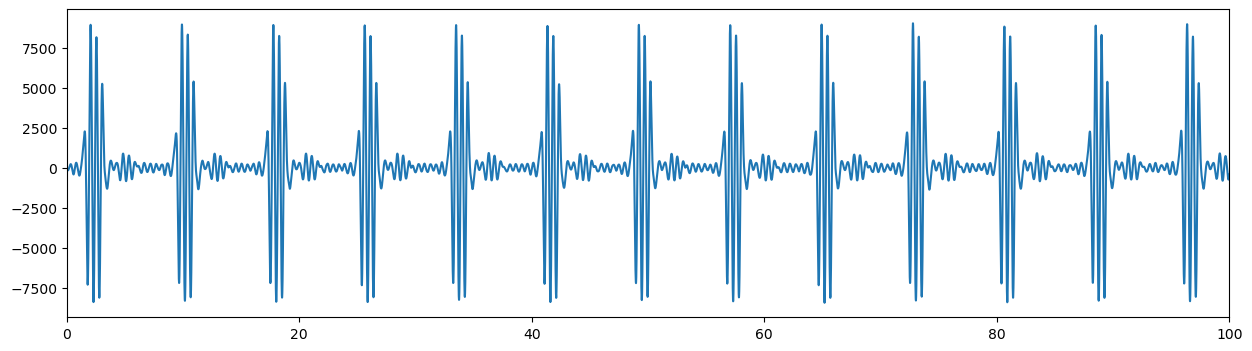

In [240]:
timestep=np.arange(0,len(waveform_conv))*1e-3
plt.figure(figsize=(15,4))
plt.plot(timestep,waveform_conv)
plt.xlim(0,100)


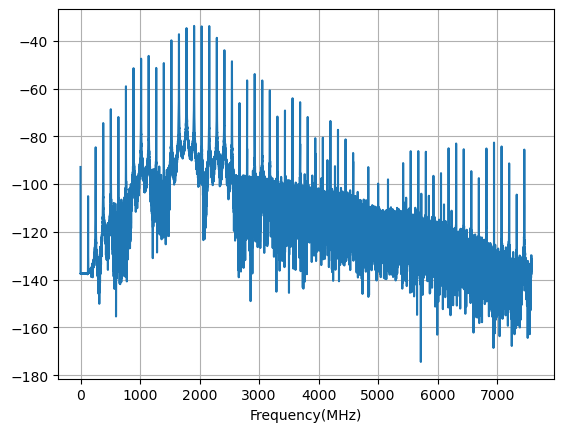

In [241]:
#FFT
size    = len(waveform_conv) # Number of data points in the file
timeBin = 1E-3 # Unit of ns
freqBin = (0.5E+3/timeBin)/float(size//2) # Units of MHz
freqSteps = np.linspace(0, freqBin*(size//2-1), num=size//2)
freq = np.fft.fft(waveform_conv)/float(size)
freq = freq[range(size//2)]
mag = 20.0*np.log10(np.abs(freq)/32767.0) # Units of dBFS

plt.plot(freqSteps[0:30000],mag[0:30000])
plt.xlabel("Frequency(MHz)")

plt.grid()

# change interval to 4ns

In [264]:
a=3930*1012
firsthalf=waveform_conv[0:int(a/2)]
latterhalf=waveform_conv[int(a/2):a]
splitarray_first=[]
splitarray_latter=[]

chunk_size=3930
for i in range(0,len(firsthalf),chunk_size):
    chunk=firsthalf[i:i+chunk_size]
    splitarray_first.append(chunk)

for i in range(0,len(latterhalf),chunk_size):
    chunk=latterhalf[i:i+chunk_size]
    splitarray_latter.append(chunk)

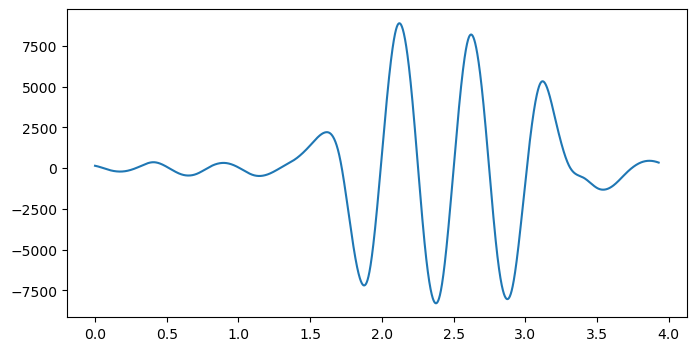

In [269]:
timestep=np.arange(0,len(splitarray_first[0]))*timeBin
plt.figure(figsize=(8,4))
plt.plot(timestep,splitarray_latter[0])

In [283]:
concat=[]
for i in range(len(splitarray_first)):
    if i % 2 ==0:
        concat.append(splitarray_first[i])
for i in range(len(splitarray_latter)):
    if i % 2 ==0:
        concat.append(splitarray_latter[i])
        
waveform_4ns=np.concatenate(concat,axis=0)

In [284]:
waveform_4ns_conv = np.convolve(waveform_4ns, h)

(10.0, 80.0)

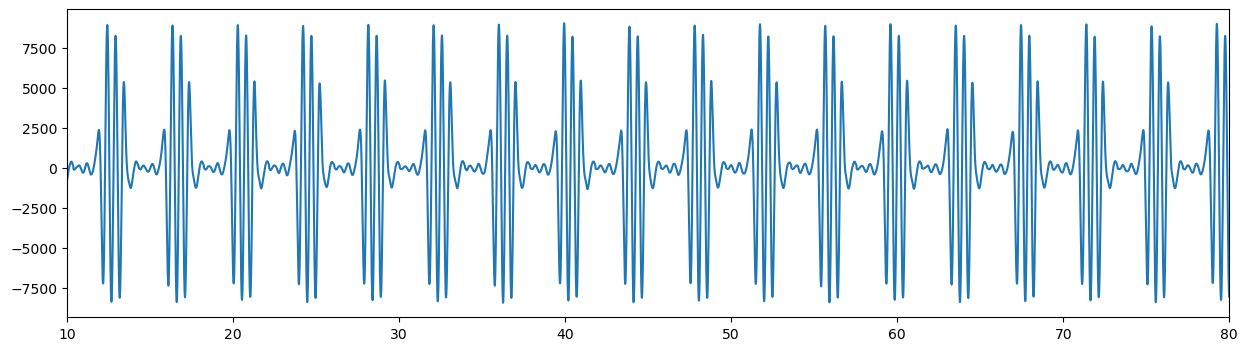

In [287]:
timestep=np.arange(0,len(waveform_4ns_conv))*1e-3
plt.figure(figsize=(15,4))
plt.plot(timestep,waveform_4ns_conv)#
plt.xlim(10,80)

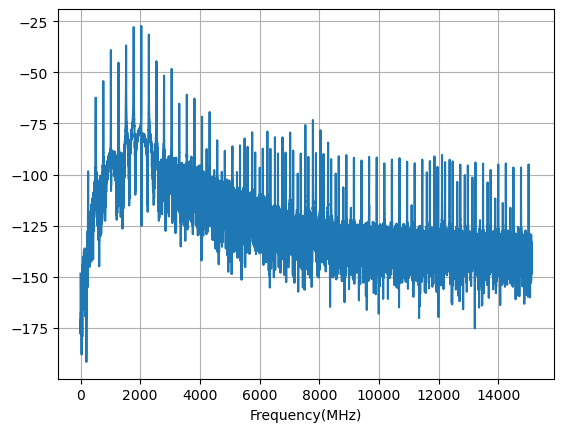

In [286]:
#FFT
size    = len(waveform_4ns_conv) # Number of data points in the file
timeBin = 1E-3 # Unit of ns
freqBin = (0.5E+3/timeBin)/float(size//2) # Units of MHz
freqSteps = np.linspace(0, freqBin*(size//2-1), num=size//2)
freq = np.fft.fft(waveform_4ns_conv)/float(size)
freq = freq[range(size//2)]
mag = 20.0*np.log10(np.abs(freq)/32767.0) # Units of dBFS

plt.plot(freqSteps[0:30000],mag[0:30000])
plt.xlabel("Frequency(MHz)")
plt.grid()

# Interporate to 3054MSPS

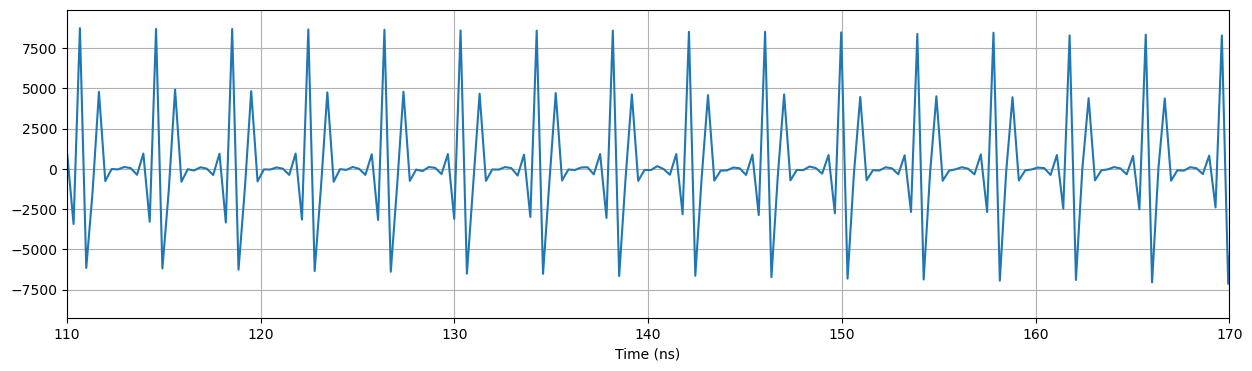

In [297]:
#  linear interpolation for this data at 3.054 GSPS
newTimeBin = 1.0/(0.509*6.0) # Unit of ns for 3.054 GSPS
newSize    = math.floor(len(waveform_4ns_conv)*3054e6/1e12)
newTimeSteps = np.linspace(0, newTimeBin*(newSize-1), num=newSize)

newwaveform = np.int16(np.interp(newTimeSteps, timestep, waveform_4ns_conv))
# Plot the time waveform (RFSoC rate)
plt.figure(figsize=(15,4))
plt.plot(newTimeSteps,newwaveform)
plt.xlabel("Time (ns)")
plt.xlim(110,170)
plt.grid()

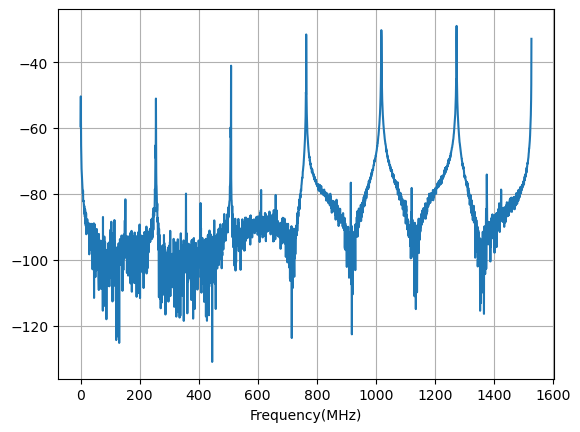

In [298]:
#FFT
size    = len(newwaveform) # Number of data points in the file
timeBin = 1000/3054 # Unit of ns
freqBin = (0.5E+3/timeBin)/float(size//2) # Units of MHz
freqSteps = np.linspace(0, freqBin*(size//2-1), num=size//2)
freq = np.fft.fft(newwaveform)/float(size)
freq = freq[range(size//2)]
mag = 20.0*np.log10(np.abs(freq)/32767.0) # Units of dBFS

plt.plot(freqSteps,mag)
plt.xlabel("Frequency(MHz)")
plt.grid()